<a href="https://colab.research.google.com/github/Tofulati/LLNL_DataScience/blob/main/Albert's_LLNL_DataScience_Challenge_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Additional test cases while processing data @: https://colab.research.google.com/drive/1JbUwBOf5Pt71nV9PQlLGE5dgmoxdOuhi?usp=sharing

# Basics on Machine Learning Notes

## Learning Types in ML

### Supervised Learning
 - learning from labeled data where the output is known
 - spam detection, image classification
 - learn a mapping from inputs to outputs

### Unsupervised Learning
 - learning from unlabeled data where the output is not known
 - clustering (grouping of unlabed examples), dimensionality reduction
 - discover patterns or structure in the data

^There is also semi-supervised learning and reinforcement learning

## Types of Tasks in ML

### Classification
- assigning inputs to predefined cateorigies
- email spam detection

### Regression
- predicting continous outputs
- house price prediction

### Clustering
- grouping similar data points together
- customer segmentation

### Dimensionality Reduction
- reducing the number of features while preserving important information
- principle component analysis (transforming a large set of variables into a smaller one that still contains most of the information in the large set)

### Anomaly Detection
- identifying rare or abnormal data points
- fraud detection, network security

## Models for Task 1

### Classification Models
 - Decision Trees: simple and interpretable, works well with numerical and categorical data
 - Support Vector Machines: effective in high-dimensional spaces, uses kernal trick
 - k-Nearest Neighbors (k-NN): simple and intuitive, based on distance metrics
 - Random Forest: ensemble of decision trees, reduces overfitting
 - Gradient boosting: ensemble techniques that builds multiple weak models sequentially, each one correcting the errors of the previous ones, to create a strong predictor

^ scikit-learn has all the models

## Cost Function

- a function that measures the error between predicted and actual values
- guide the optimization process by providing a measure to minimize
- Mean Squared Error: common for regression, measures average squared error
- Cross-Entropy Loss: common for classification, measures the difference between predictred and actual probability distributions
- Hinge Loss: used in SVM, focuses on maximizing the margin between classes


# Connect drive to notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


## Importing files


# Task 1

Get familiar working with ECG data by using the ECG Heartbeat Categorization Dataset to perform binary classification for healthy heartbeat vs. irregular heartbeat

Dataset: https://www.kaggle.com/datasets/shayanfazeli/heartbeat?resource=download&select=mitbih_train.csv

Import normal data

In [ ]:
import pandas as pd
normal = pd.read_csv('drive/MyDrive/LLNL_DataScience/data/ptbdb_normal.csv', header=None)
normal

0         1         2         3         4         5         6    \
0     1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1     1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2     0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3     1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4     1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
...        ...       ...       ...       ...       ...       ...       ...   
4041  1.000000  0.929586  0.503550  0.293491  0.169822  0.159763  0.130769   
4042  1.000000  0.637579  0.154837  0.061983  0.088965  0.083374  0.065143   
4043  1.000000  0.872574  0.465071  0.232212  0.126132  0.155886  0.174644   
4044  0.915983  0.529373  0.288406  0.144536  0.171802  0.180669  0.177566   
4045  1.000000  0.838643  0.390567  0.191146  0.033513  0.055854  0.129086   

           7         8         9    ...  178  179  180  181  182  183  184  \
0     0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
4041  0.125444  0.137278  0.111243  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4042  0.057365  0.060039  0.060039  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4043  0.190168  0.203752  0.168823  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4044  0.176458  0.178896  0.180448  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4045  0.147290  0.155151  0.165494  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      185  186  187  
0     0.0  0.0  0.0  
1     0.0  0.0  0.0  
2     0.0  0.0  0.0  
3     0.0  0.0  0.0  
4     0.0  0.0  0.0  
...   ...  ...  ...  
4041  0.0  0.0  0.0  
4042  0.0  0.0  0.0  
4043  0.0  0.0  0.0  
4044  0.0  0.0  0.0  
4045  0.0  0.0  0.0  

[4046 rows x 188 columns]

In [ ]:
normal.describe()

0            1            2            3            4    \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000   
mean      0.979670     0.711486     0.311677     0.119575     0.088608   
std       0.029061     0.186376     0.183457     0.110457     0.075760   
min       0.782178     0.121784     0.000000     0.000000     0.000000   
25%       0.964468     0.580160     0.164112     0.028731     0.027735   
50%       1.000000     0.726449     0.303266     0.092655     0.079476   
75%       1.000000     0.863699     0.436091     0.187527     0.134861   
max       1.000000     1.000000     0.985955     0.910798     0.846591   

               5            6            7            8            9    ...  \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000  ...   
mean      0.130843     0.159653     0.165608     0.168005     0.170783  ...   
std       0.081104     0.090131     0.096094     0.102506     0.106190  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.070776     0.094656     0.098848     0.095594     0.094988  ...   
50%       0.121144     0.134312     0.142771     0.143002     0.145068  ...   
75%       0.183746     0.216203     0.217895     0.220572     0.223053  ...   
max       0.770205     0.754524     0.749095     0.729192     0.700844  ...   

               178          179          180          181          182  \
count  4046.000000  4046.000000  4046.000000  4046.000000  4046.000000   
mean      0.001540     0.001332     0.001304     0.001220     0.000991   
std       0.018664     0.016234     0.016668     0.016658     0.015204   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.415879     0.361283     0.383522     0.407025     0.446281   

               183          184          185     186     187  
count  4046.000000  4046.000000  4046.000000  4046.0  4046.0  
mean      0.000894     0.000454     0.000474     0.0     0.0  
std       0.015311     0.010834     0.011202     0.0     0.0  
min       0.000000     0.000000     0.000000     0.0     0.0  
25%       0.000000     0.000000     0.000000     0.0     0.0  
50%       0.000000     0.000000     0.000000     0.0     0.0  
75%       0.000000     0.000000     0.000000     0.0     0.0  
max       0.483471     0.371502     0.376668     0.0     0.0  

[8 rows x 188 columns]

Import abnormal data


In [ ]:
import pandas as pd
abnormal = pd.read_csv('drive/MyDrive/LLNL_DataScience/data/ptbdb_abnormal.csv', header=None)
abnormal

0         1         2         3         4         5         6    \
0      0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1      1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2      1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3      0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4      0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   
...         ...       ...       ...       ...       ...       ...       ...   
10501  0.981409  1.000000  0.559171  0.287093  0.196639  0.204862  0.215946   
10502  0.906250  0.922379  0.878024  0.810484  0.712702  0.667339  0.608871   
10503  1.000000  0.867971  0.674122  0.470332  0.296987  0.169307  0.077664   
10504  1.000000  0.984672  0.658888  0.556394  0.446809  0.395790  0.315260   
10505  0.997886  0.700317  0.464059  0.318182  0.233615  0.184989  0.124207   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.749783  0.687229  0.635100  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.184826  0.153349  0.121872  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.685100  0.670507  0.667435  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.367837  0.381701  0.389094  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.319834  0.266874  0.308411  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
10501  0.243833  0.242760  0.250268  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10502  0.527218  0.480847  0.442540  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10503  0.081392  0.074868  0.089779  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10504  0.276367  0.261039  0.258522  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10505  0.082981  0.087738  0.063953  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  1.0  
1      0.0  0.0  1.0  
2      0.0  0.0  1.0  
3      0.0  0.0  1.0  
4      0.0  0.0  1.0  
...    ...  ...  ...  
10501  0.0  0.0  1.0  
10502  0.0  0.0  1.0  
10503  0.0  0.0  1.0  
10504  0.0  0.0  1.0  
10505  0.0  0.0  1.0  

[10506 rows x 188 columns]

In [ ]:
abnormal.describe()

0             1             2             3             4    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.975468      0.725582      0.438306      0.290384      0.252897   
std        0.036354      0.199030      0.262699      0.270977      0.237004   
min        0.624227      0.000000      0.000000      0.000000      0.000000   
25%        0.957325      0.586602      0.236455      0.074064      0.088487   
50%        1.000000      0.745646      0.404297      0.212845      0.173046   
75%        1.000000      0.890043      0.620889      0.427811      0.343089   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.000000   
mean       0.249423      0.245668      0.247160      0.250203      0.252396   
std        0.211751      0.200159      0.194840      0.193160      0.192341   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.101422      0.097175      0.096331      0.098527      0.098041   
50%        0.180927      0.182782      0.191793      0.197088      0.200919   
75%        0.327582      0.328089      0.347707      0.359378      0.370106   
max        1.000000      1.000000      0.985523      0.993213      0.997738   

       ...           178           179           180           181  \
count  ...  10506.000000  10506.000000  10506.000000  10506.000000   
mean   ...      0.001055      0.001057      0.000744      0.000554   
std    ...      0.022312      0.022585      0.017557      0.013781   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      0.791899      0.773743      0.789804      0.628177   

                182           183           184           185      186  \
count  10506.000000  10506.000000  10506.000000  10506.000000  10506.0   
mean       0.000533      0.000313      0.000070      0.000074      0.0   
std        0.013553      0.010901      0.003754      0.004044      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        0.000000      0.000000      0.000000      0.000000      0.0   
max        0.602033      0.644880      0.265025      0.279310      0.0   

           187  
count  10506.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  

[8 rows x 188 columns]

## Plotting data

In [ ]:
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt

Plotting first normal column

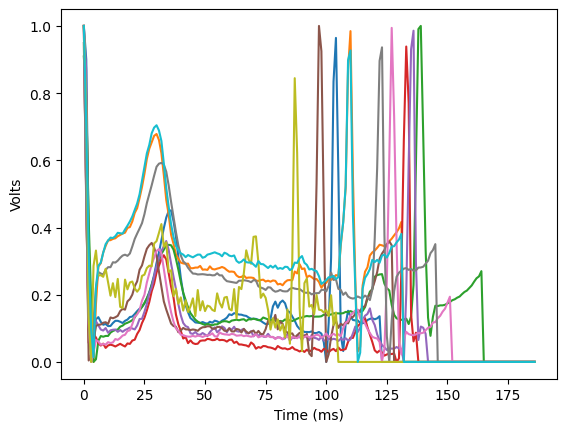

In [ ]:
plt.xlabel('Time (ms)')
plt.ylabel('Volts')

plt.plot(normal.iloc[0:10, :-1].T)

Plotting first abnormal column

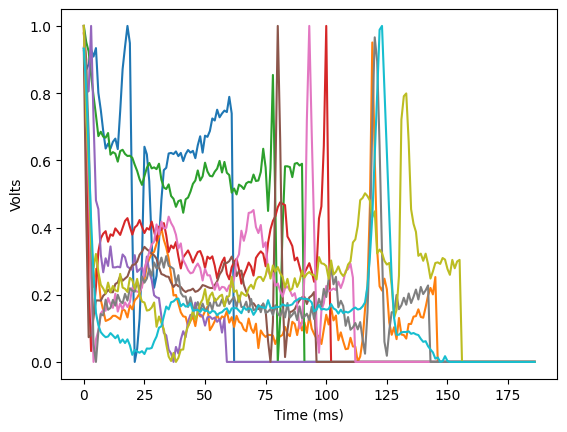

In [ ]:
plt.xlabel('Time (ms)')
plt.ylabel('Volts')

plt.plot(abnormal.iloc[0:10, :-1].T)

## Combining datasets

In [ ]:
df = pd.concat([normal, abnormal], ignore_index=True)

Rename last line to indicate abnormalities

In [ ]:
df = df.rename(columns={df.columns[-1]: 'Abnormality'})
df

0         1         2         3         4         5         6  \
0      1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1      1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2      0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3      1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4      1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
...         ...       ...       ...       ...       ...       ...       ...   
14547  0.981409  1.000000  0.559171  0.287093  0.196639  0.204862  0.215946   
14548  0.906250  0.922379  0.878024  0.810484  0.712702  0.667339  0.608871   
14549  1.000000  0.867971  0.674122  0.470332  0.296987  0.169307  0.077664   
14550  1.000000  0.984672  0.658888  0.556394  0.446809  0.395790  0.315260   
14551  0.997886  0.700317  0.464059  0.318182  0.233615  0.184989  0.124207   

              7         8         9  ...  178  179  180  181  182  183  184  \
0      0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
14547  0.243833  0.242760  0.250268  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14548  0.527218  0.480847  0.442540  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14549  0.081392  0.074868  0.089779  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14550  0.276367  0.261039  0.258522  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
14551  0.082981  0.087738  0.063953  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  Abnormality  
0      0.0  0.0          0.0  
1      0.0  0.0          0.0  
2      0.0  0.0          0.0  
3      0.0  0.0          0.0  
4      0.0  0.0          0.0  
...    ...  ...          ...  
14547  0.0  0.0          1.0  
14548  0.0  0.0          1.0  
14549  0.0  0.0          1.0  
14550  0.0  0.0          1.0  
14551  0.0  0.0          1.0  

[14552 rows x 188 columns]

In [ ]:
df.describe()

0             1             2             3             4  \
count  14552.000000  14552.000000  14552.000000  14552.000000  14552.000000   
mean       0.976637      0.721663      0.403099      0.242893      0.207218   
std        0.034532      0.195690      0.249794      0.249519      0.218097   
min        0.624227      0.000000      0.000000      0.000000      0.000000   
25%        0.959377      0.584589      0.212300      0.052269      0.061875   
50%        1.000000      0.740148      0.371911      0.168148      0.136082   
75%        1.000000      0.881483      0.557785      0.336232      0.264104   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  14552.000000  14552.000000  14552.000000  14552.000000  14552.000000   
mean       0.216453      0.221752      0.224486      0.227349      0.229704   
std        0.192412      0.180740      0.176943      0.176674      0.176579   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.090487      0.096503      0.097095      0.097231      0.097144   
50%        0.159451      0.167479      0.171541      0.177380      0.180337   
75%        0.264633      0.286484      0.302255      0.311664      0.325292   
max        1.000000      1.000000      0.985523      0.993213      0.997738   

       ...           178           179           180           181  \
count  ...  14552.000000  14552.000000  14552.000000  14552.000000   
mean   ...      0.001190      0.001133      0.000900      0.000739   
std    ...      0.021361      0.021012      0.017316      0.014640   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      0.791899      0.773743      0.789804      0.628177   

                182           183           184           185      186  \
count  14552.000000  14552.000000  14552.000000  14552.000000  14552.0   
mean       0.000661      0.000475      0.000177      0.000185      0.0   
std        0.014033      0.012289      0.006545      0.006835      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      0.000000      0.000000      0.0   
75%        0.000000      0.000000      0.000000      0.000000      0.0   
max        0.602033      0.644880      0.371502      0.376668      0.0   

        Abnormality  
count  14552.000000  
mean       0.721963  
std        0.448047  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000  

[8 rows x 188 columns]

<Axes: >

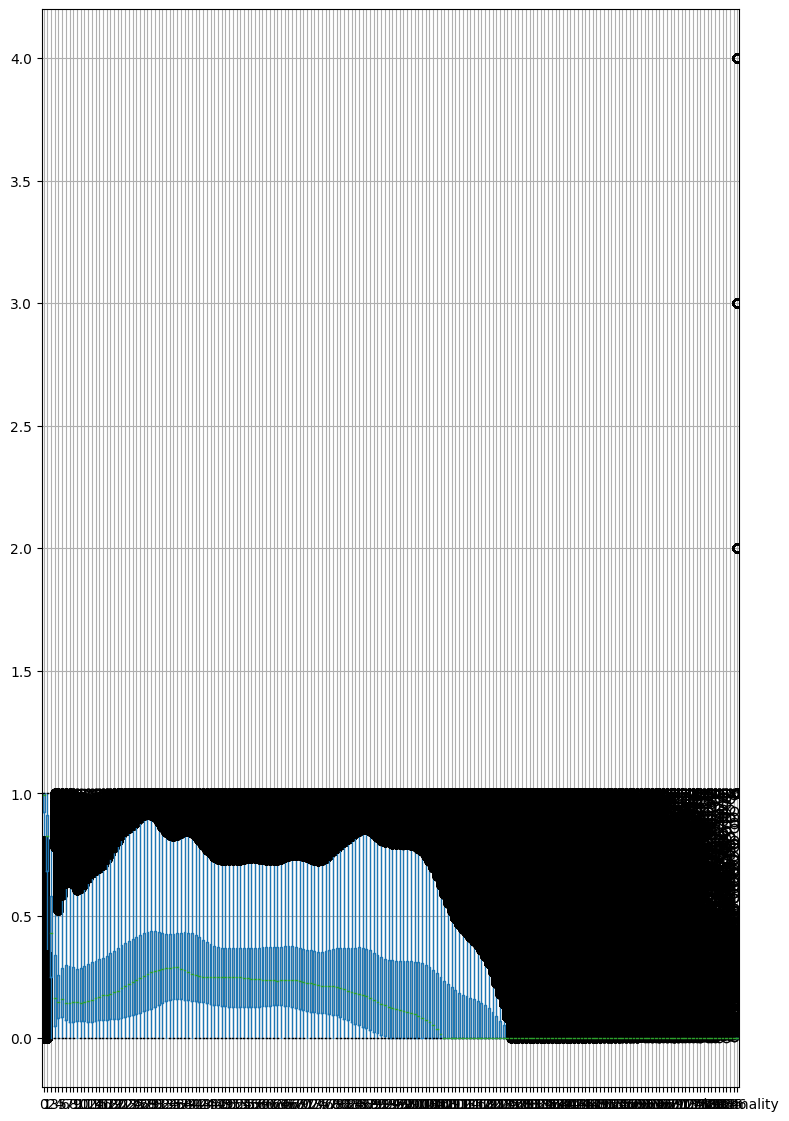

In [ ]:
plt.figure(figsize=(9,14))

df.boxplot()

Graph sample plots with abnormality indicator

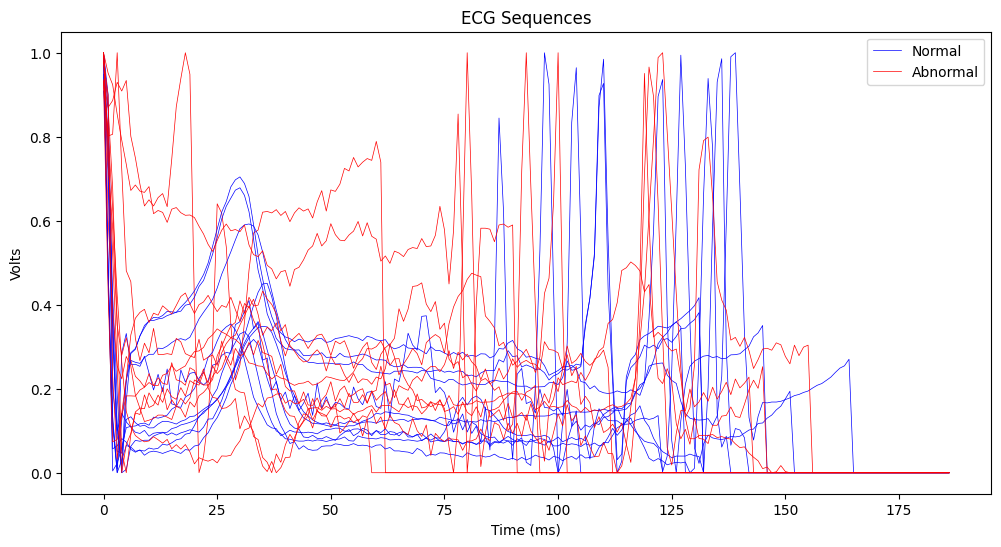

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(df.iloc[0, :-1].T, color='Blue', label='Normal', linewidth=0.5)
plt.plot(df.iloc[4046, :-1].T, color='Red', label='Abnormal', linewidth=0.5)

plt.plot(df.iloc[1:10, :-1].T, color='Blue', linewidth=0.5)
plt.plot(df.iloc[4047:4056, :-1].T, color='Red', linewidth=0.5)

plt.xlabel('Time (ms)')
plt.ylabel('Volts')
plt.title('ECG Sequences')

plt.legend()

plt.show()

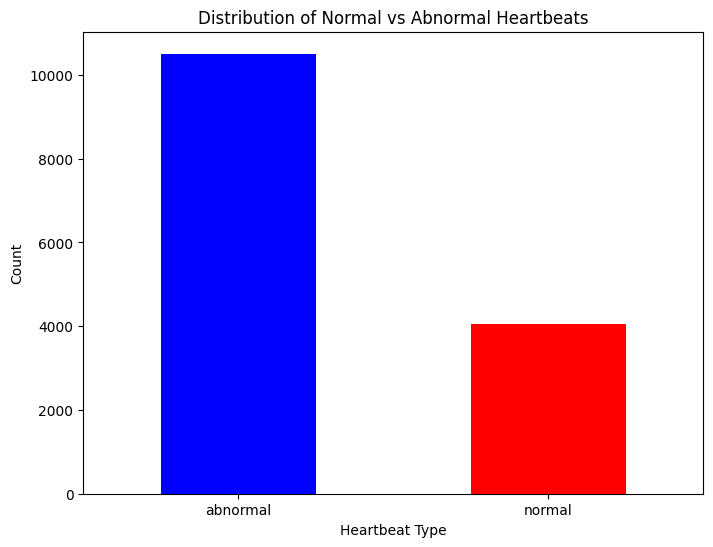

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataframes (replace these with your actual data)
# Assuming normal_df and abnormal_df contain only the observations
normal_df = normal  # Replace with actual data
abnormal_df = abnormal  # Replace with actual data

# Add a column to indicate the type of heartbeat
normal_df['heartbeat'] = 'normal'
abnormal_df['heartbeat'] = 'abnormal'

# Combine the dataframes
combined_df = pd.concat([normal_df, abnormal_df])

# Count the occurrences of each heartbeat type
heartbeat_counts = combined_df['heartbeat'].value_counts()

# Create the bar graph
plt.figure(figsize=(8, 6))
heartbeat_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Normal vs Abnormal Heartbeats')
plt.xlabel('Heartbeat Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


## Splitting data

In [ ]:
# Observations
X = df.iloc[:, :-1]

# Abnormalities
y = df.iloc[:, -1]

In [ ]:
X.head()

0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  177  178  179  180  181  182  183  184  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   185  186  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 187 columns]

In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Abnormality, dtype: float64

## Training data

Create a split training data set with training and test data. The test size is 25:75 and a shuffled assignment.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30, shuffle=True)

X data after split

In [ ]:
X_train.shape

(10914, 187)

In [ ]:
X_test.shape

(3638, 187)

y data after split

In [ ]:
y_train.shape

(10914,)

In [ ]:
y_test.shape

(3638,)

### Cross Validation

Stratified K Fold Cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TRAIN: [  810   811   812 ... 14549 14550 14551] TEST: [   0    1    2 ... 6144 6145 6146]
TRAIN: [    0     1     2 ... 14549 14550 14551] TEST: [ 810  811  812 ... 8246 8247 8248]
TRAIN: [    0     1     2 ... 14549 14550 14551] TEST: [ 1619  1620  1621 ... 10347 10348 10349]
TRAIN: [    0     1     2 ... 14549 14550 14551] TEST: [ 2428  2429  2430 ... 12448 12449 12450]
TRAIN: [    0     1     2 ... 12448 12449 12450] TEST: [ 3237  3238  3239 ... 14549 14550 14551]


### Support Vector Machines





Support Vector Classification

In [ ]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8316151202749141

Support Vector Regression

In [ ]:
clf = svm.SVR()
cross_val_score(clf, X_train, y_train)

### Nearest Centroid Classifier


In [ ]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
cross_val_score(clf, X_train, y_train, cv=5)

array([0.59252898, 0.58480034, 0.6056701 , 0.60738832, 0.59321306])

### Decision Tree

Binary tree with different observations placed against a specific tolerance. When completed, the values are placed in buckets determining whether they are abnormal or normal.

Decision Tree Classifier training


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=5)

### Random Trees [Utilzed for results]


Better than Log Regression (.9 accuracy) since the log reg is a linear regression compared to a tree.

Random Trees Classifier training


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=5)

array([0.96436239, 0.97638471, 0.96778351, 0.9669244 , 0.97379725])

Random Trees fitting

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

Predicting values

In [ ]:
y_test_pred = rf.predict(X_test)

Test accuracy for the test

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred, normalize=True)

0.9711340206185567

Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[ 749,   60],
       [  24, 2077]])

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Define parameter grid

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


### Best Parameter Testing

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)

print(accuracy_score(y_test, y_test_pred, normalize=True))

confusion_matrix(y_test, y_test_pred)

0.9708631115997801


array([[ 930,   65],
       [  41, 2602]])

# Task 2

Diagnosing an irregular heartbeat by using the ECG Heartbeat Categorization Dataset to perform multiclass classification to diagnose the irregular heartbeats.

Dataset: https://www.kaggle.com/datasets/shayanfazeli/heartbeat?resource=download&select=mitbih_train.csv

In [ ]:
import pandas as pd
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt

## Display training and test data

Training data

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/LLNL_DataScience/data/mitbih_train.csv', header=None)
train.head()

0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

Test data

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/LLNL_DataScience/data/mitbih_test.csv', header=None)
test.head()

0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

## Labelling columns

In [ ]:
train = train.rename(columns={train.columns[-1]: 'Abnormality'})
train.head()

0         1         2         3         4         5         6  \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

          7         8         9  ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  Abnormality  
0  0.0          0.0  
1  0.0          0.0  
2  0.0          0.0  
3  0.0          0.0  
4  0.0          0.0  

[5 rows x 188 columns]

In [ ]:
test = test.rename(columns={test.columns[-1]: 'Abnormality'})
test.head()

0         1         2         3         4         5         6  \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

          7         8         9  ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  Abnormality  
0  0.0          0.0  
1  0.0          0.0  
2  0.0          0.0  
3  0.0          0.0  
4  0.0          0.0  

[5 rows x 188 columns]

## Graphing test and training samples

### See distribution of the abnormalities

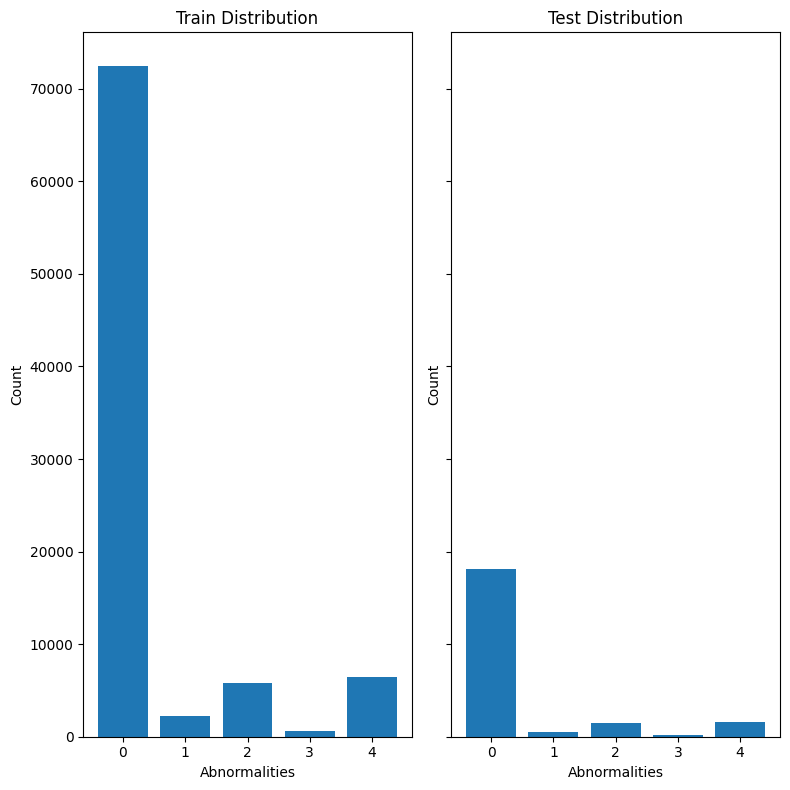

In [ ]:
df1 = pd.DataFrame(train)
df2 = pd.DataFrame(test)

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharey=True)

cat1 = df1['Abnormality'].value_counts()
cat2 = df2['Abnormality'].value_counts()

axes[0].bar(cat1.index, cat1.values)
axes[0].set_xlabel('Abnormalities')
axes[0].set_ylabel('Count')
axes[0].set_title('Train Distribution')

axes[1].bar(cat2.index, cat2.values)
axes[1].set_xlabel('Abnormalities')
axes[1].set_ylabel('Count')
axes[1].set_title('Test Distribution')

plt.tight_layout()
plt.show()

### Graphing sample values

Took to long to process, will get back once I find a more optimized function

\

** Revisiting

\
See 10 line graphs of the rhythms to see what the patterns are

Training data

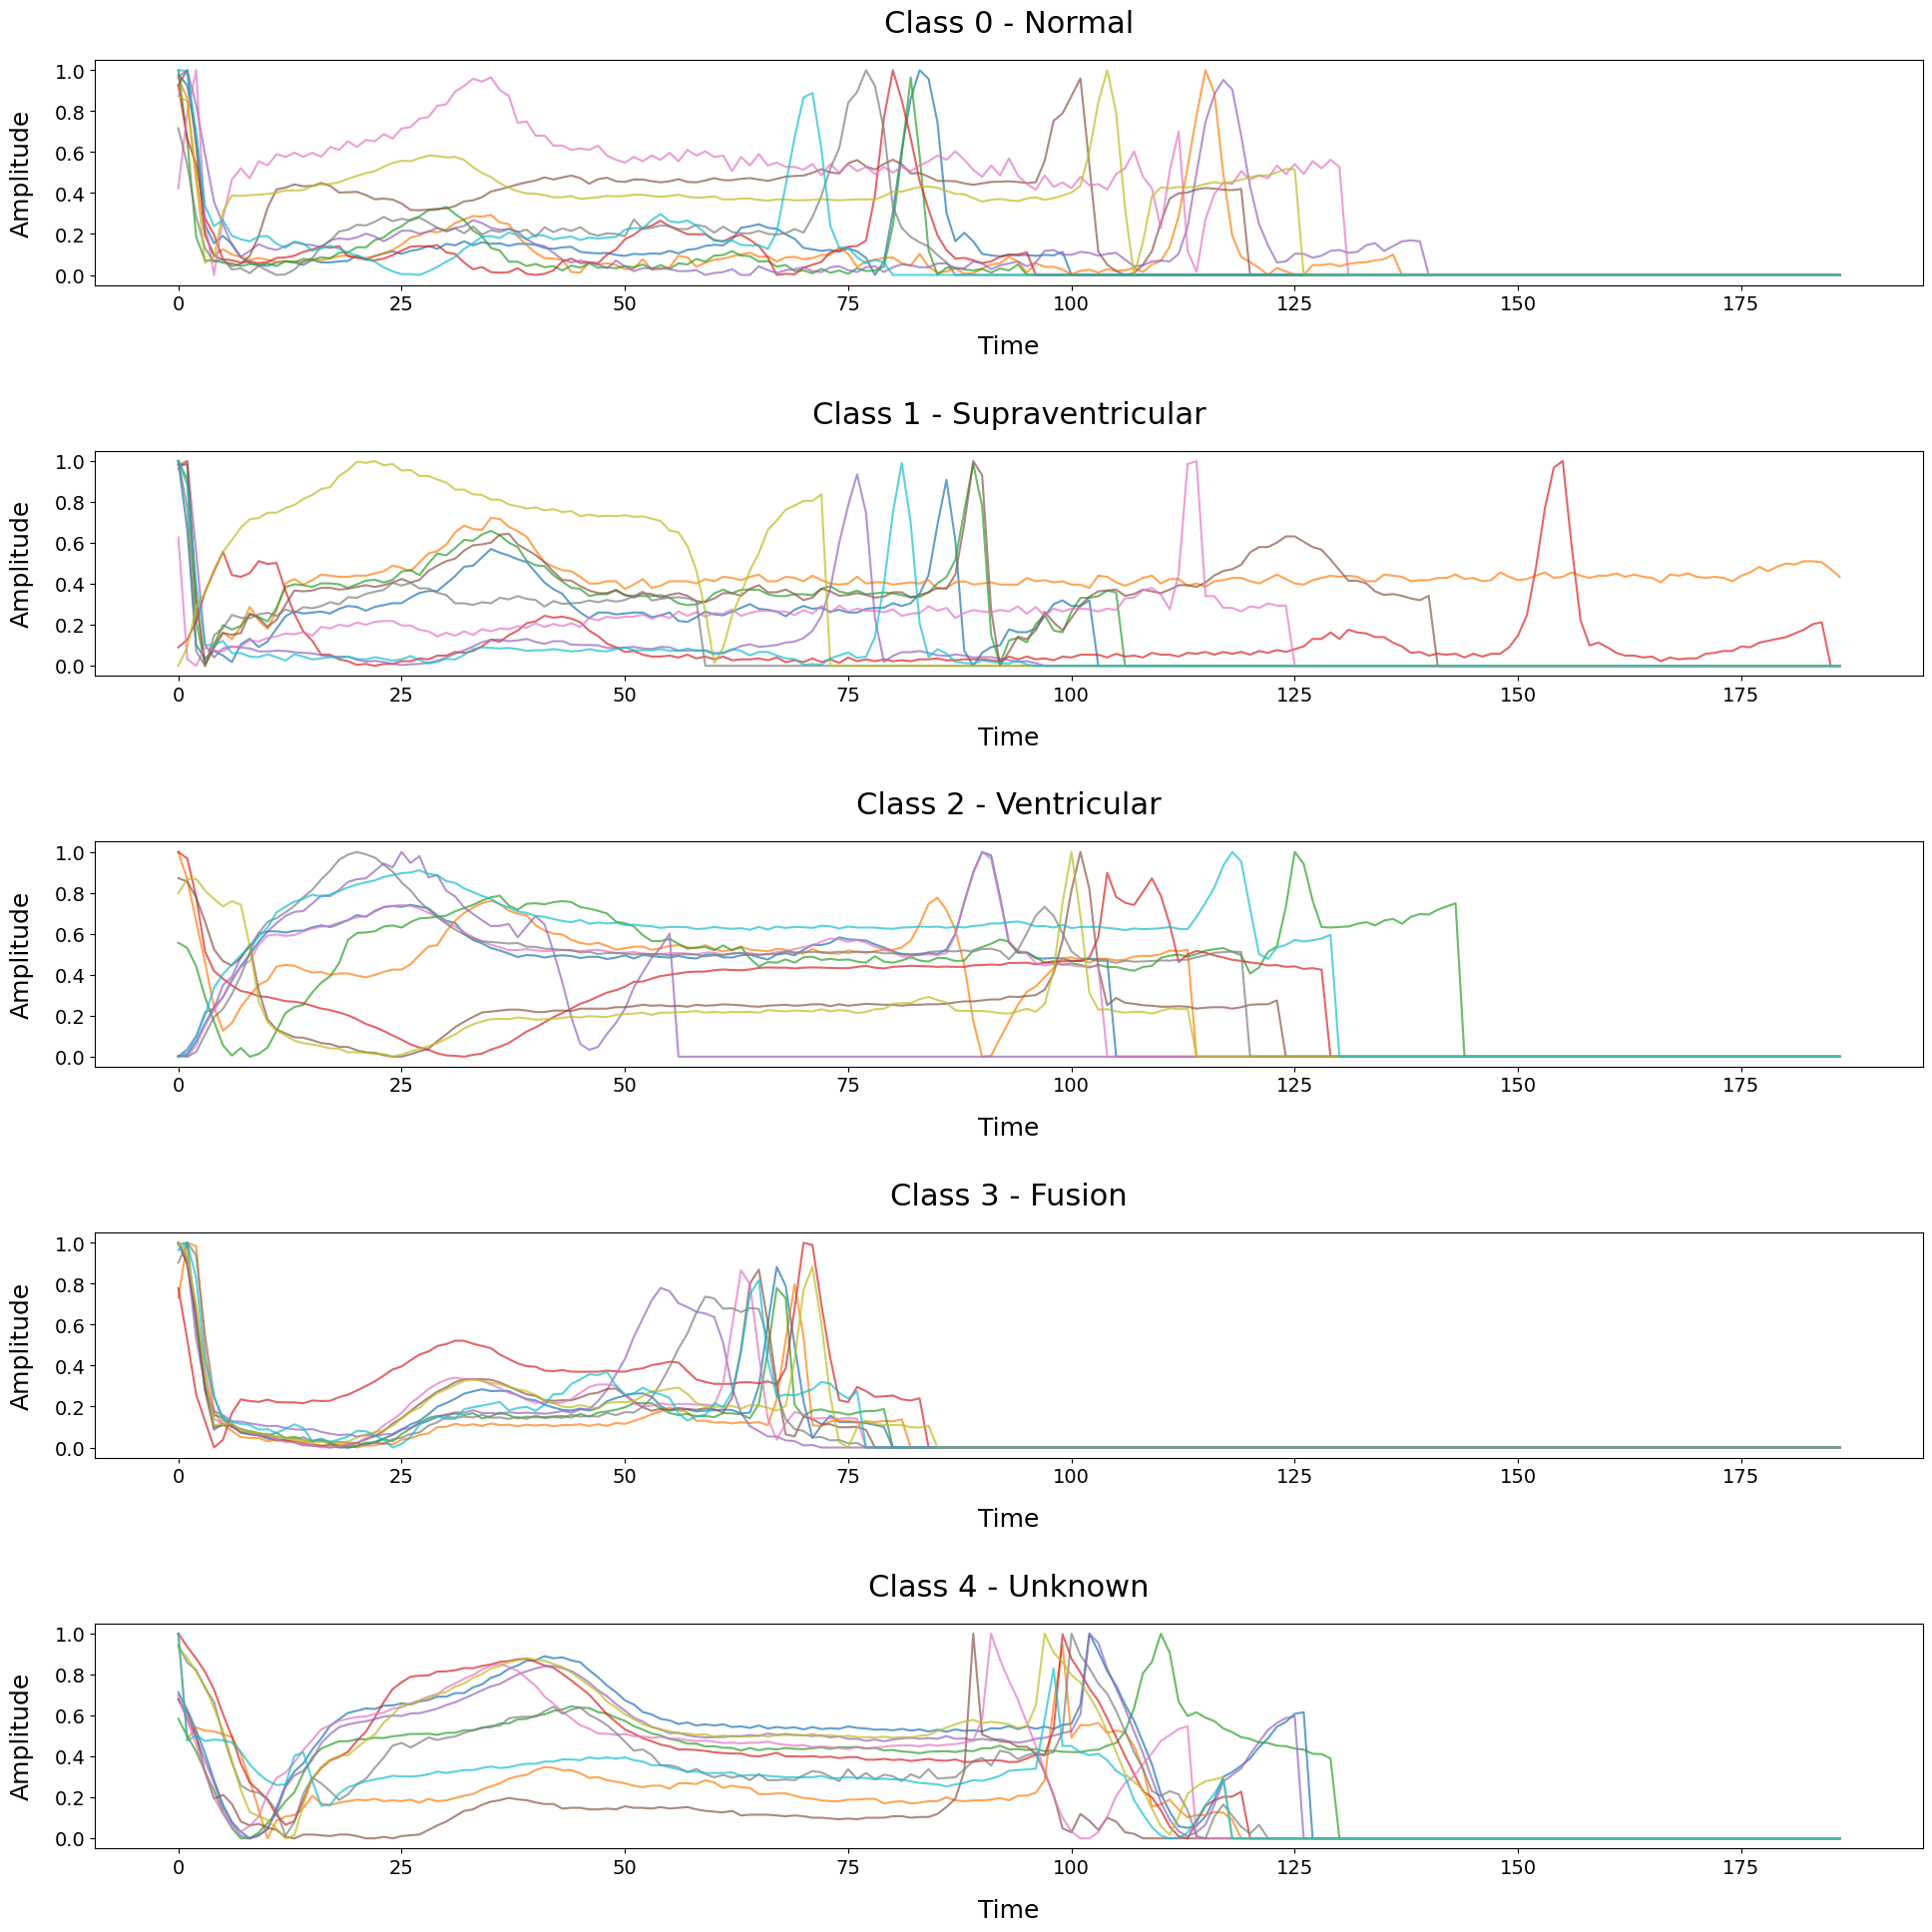

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(train)

# Plotting the sampled data
# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Plotting 10 samples from each class
plt.figure(figsize=(20, 20))

for i in range(5):
    plt.subplot(5, 1, i+1)
    samples = train[train['Abnormality'] == i].head(10).drop('Abnormality', axis=1).values
    for sample in samples:
        plt.plot(sample, alpha=0.7)
    plt.title(f'Class {i} - {class_labels[i]}', fontsize=22, pad=20)
    plt.xlabel('Time', fontsize=18, labelpad=15)
    plt.ylabel('Amplitude', fontsize=18, labelpad=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

plt.tight_layout(pad=3.0)
plt.show()


## Splitting Data

Split train data into X and y variables

In [ ]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[: , -1]

Split test data into X and y variables

In [ ]:
X_test = test.iloc[:, :-1]
y_test = test.iloc[: , -1]

### Checking split data

Look at training data shape data

In [ ]:
X_train.shape

(87554, 187)

In [ ]:
y_train.shape

(87554,)

Look at test data shape data

In [ ]:
X_test.shape

(21892, 187)

In [ ]:
y_test.shape

(21892,)

In [ ]:
y_test.iloc[-1000:]

20892    4.0
20893    4.0
20894    4.0
20895    4.0
20896    4.0
        ... 
21887    4.0
21888    4.0
21889    4.0
21890    4.0
21891    4.0
Name: Abnormality, Length: 1000, dtype: float64

## Testing Models on Pre-Altered Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=5)

array([0.97413055, 0.97761407, 0.97475872, 0.97441608, 0.9743004 ])

### Grid Search for Random Forest Classifier

In [ ]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

NameError: name 'RandomForestClassifier' is not defined

Predicting values

In [ ]:
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

NameError: name 'clf' is not defined

Taking test examples and predicts the classes

In [ ]:
clf.predict(X_test.iloc[-1000:])

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4., 4., 4., 0., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 0., 4.,
       4., 4., 4., 4., 4., 4., 4., 0., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 0., 4., 4., 0., 4., 0., 4., 4., 4., 4., 4., 4., 4., 4.,
       0., 4., 4., 4., 4.

Shows the number of classes

In [ ]:
pd.Series(y_test_pred).value_counts()

0.0    18616
4.0     1525
2.0     1305
1.0      335
3.0      111
Name: count, dtype: int64

Test accuracy for the test

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred, normalize=True)

0.9738260551799744

Make confusion matrixes for each of the individual classes

OHE: One Hot Encoding

Creates columns for each of the categories and shows true or false for each of the categories

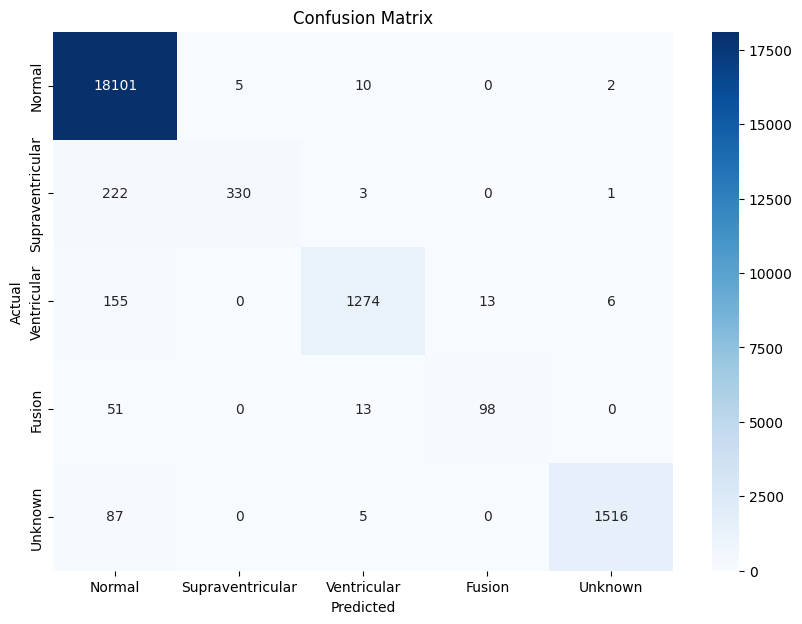

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

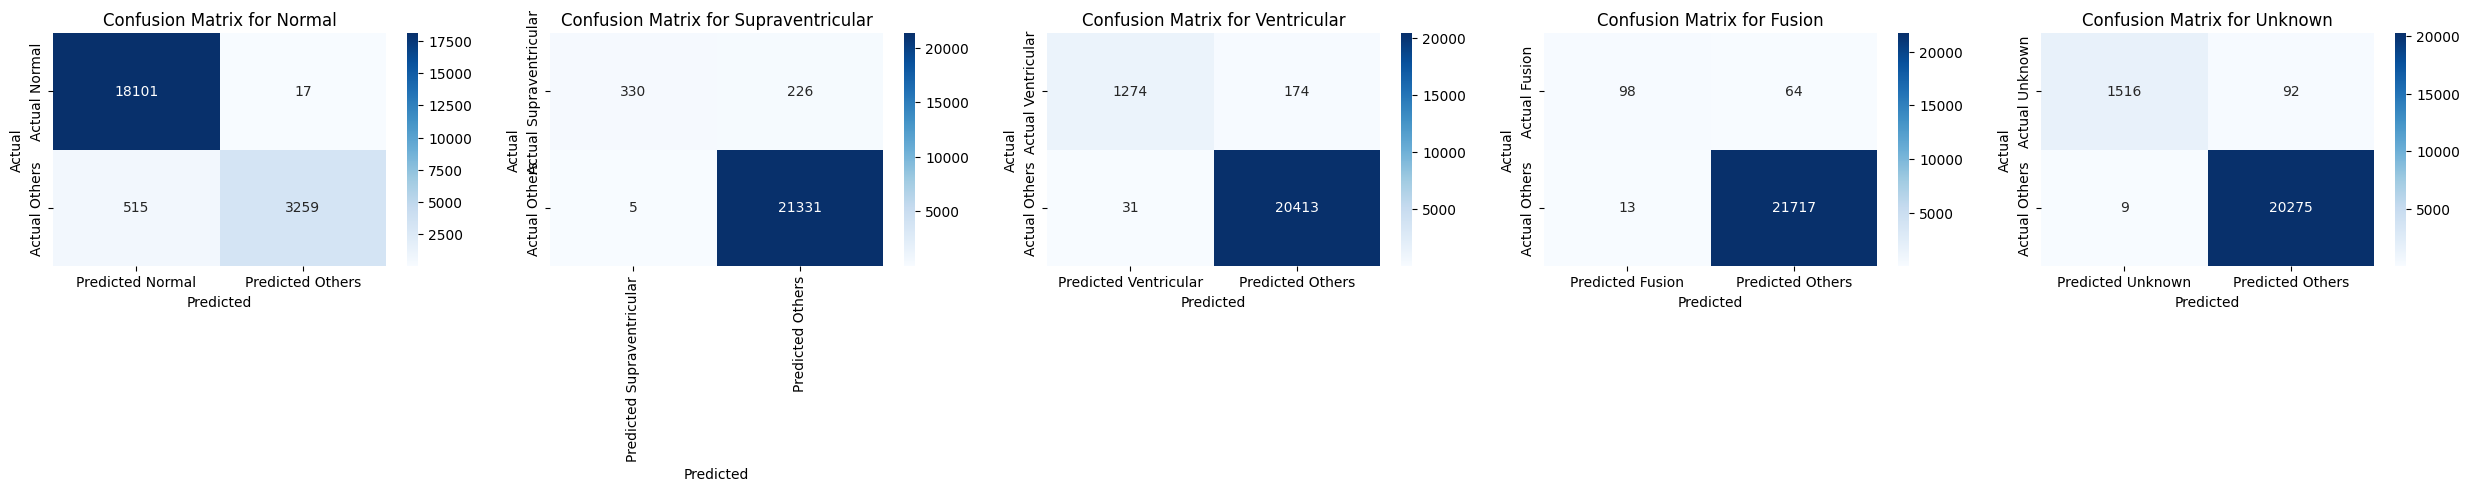

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Create subplots for individual confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, label in enumerate(class_labels):
    # Create a binary confusion matrix for the current class
    binary_cm = np.array([
        [cm[i, i], sum(cm[i, :]) - cm[i, i]],
        [sum(cm[:, i]) - cm[i, i], sum(sum(cm)) - (sum(cm[i, :]) + sum(cm[:, i]) - cm[i, i])]
    ])

    # Plot the confusion matrix
    sns.heatmap(binary_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted ' + label, 'Predicted Others'],
                yticklabels=['Actual ' + label, 'Actual Others'],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### XGBoost for Un-altered Data

Weights: [ 0.14643935 (N)  2.72287358 (Q)  3.02536282 (V) 7.87710301 (S) 27.31794072 (F)]

In [ ]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y = y_train
)

for i in range(len(classes_weights)):
  if classes_weights[i] < 1:
    classes_weights[i] = classes_weights[i]/1.65

print(np.unique(classes_weights))

[ 0.14643935  2.72287358  3.02536282  7.87710301 27.31794072]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(learning_rate=0.1, max_depth=9, n_estimators=200)

xgb.fit(X_train, y_train, sample_weight = classes_weights)

y_test_pred = xgb.predict(X_test)

accuracy_score(y_test, y_test_pred, normalize=True)

0.9822309519459164

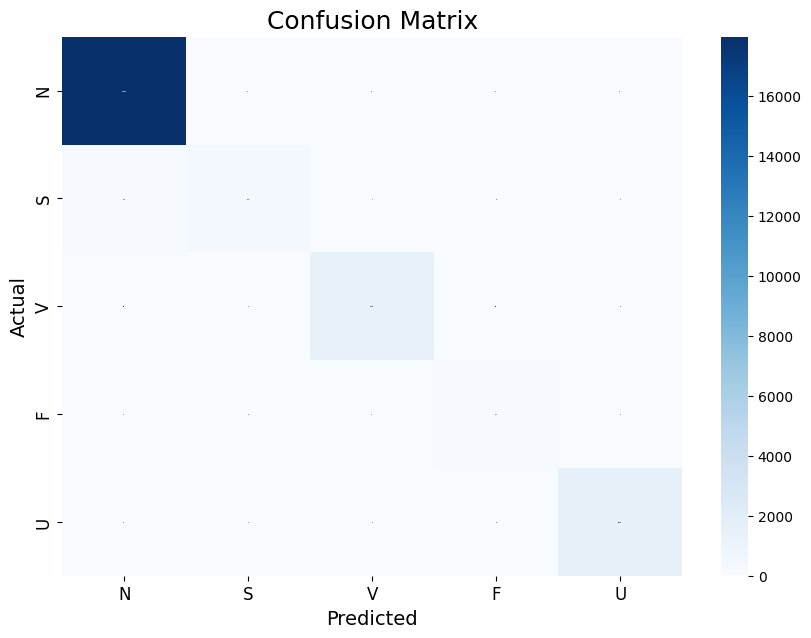

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['N', 'S', 'V', 'F', 'U']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 1, "weight": "bold"})
plt.xlabel('Predicted', fontdict={'size': 14})
plt.ylabel('Actual', fontdict={'size': 14})
plt.title('Confusion Matrix', fontdict={'size': 18})

# Increase the font size for the x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


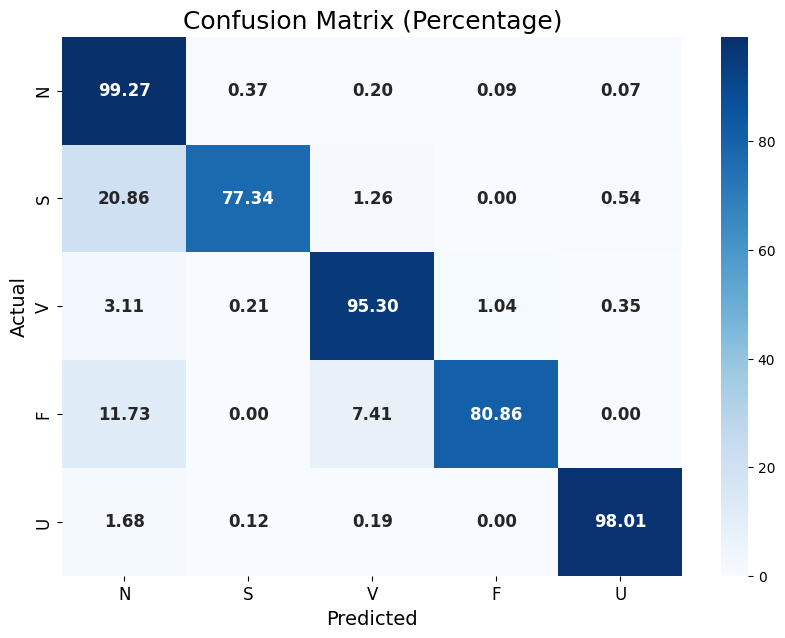

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Define the class labels
class_labels = ['N', 'S', 'V', 'F', 'U']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, annot_kws={"size": 12, "weight": "bold"})
plt.xlabel('Predicted', fontdict={'size': 14})
plt.ylabel('Actual', fontdict={'size': 14})
plt.title('Confusion Matrix (Percentage)', fontdict={'size': 18})

# Increase the font size for the x and y ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


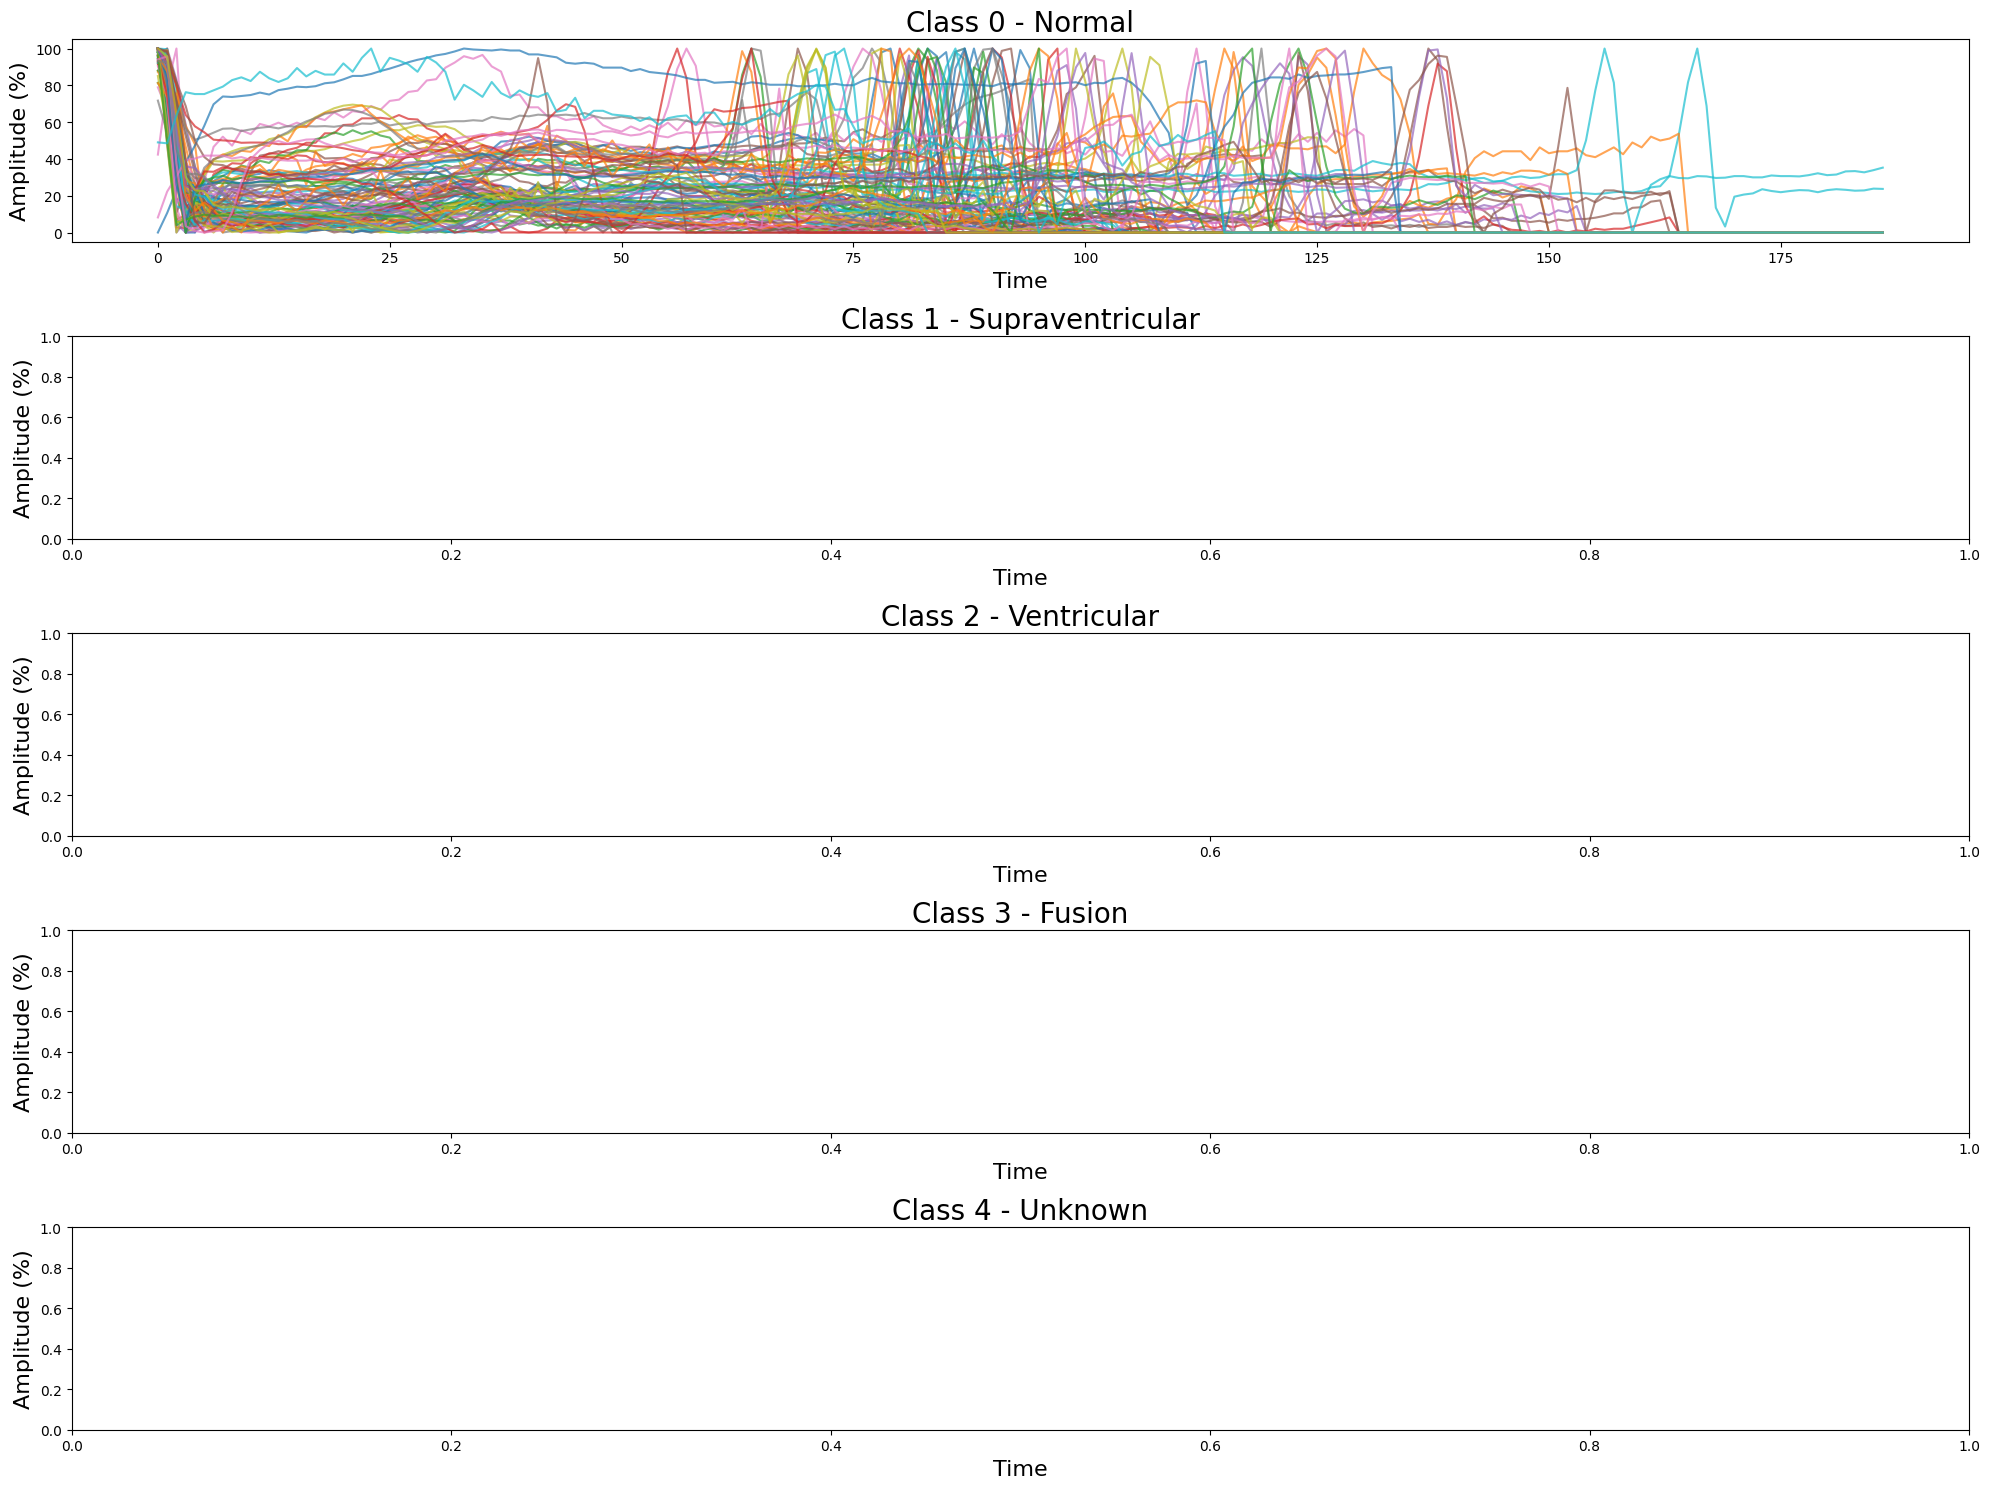

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your dataset
df = pd.DataFrame(train)

# Convert numerical values to percentages
df_percentage = df * 100

# Plotting the sampled data
# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Plotting 10 samples from each class
plt.figure(figsize=(20, 15))

for i in range(5):
    plt.subplot(5, 1, i+1)
    samples = df_percentage[df_percentage['Abnormality'] == i].head(100).drop('Abnormality', axis=1).values
    for sample in samples:
        plt.plot(sample, alpha=0.7)
    plt.title(f'Class {i} - {class_labels[i]}', fontsize=20)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Amplitude (%)', fontsize=16)

plt.tight_layout()
plt.show()


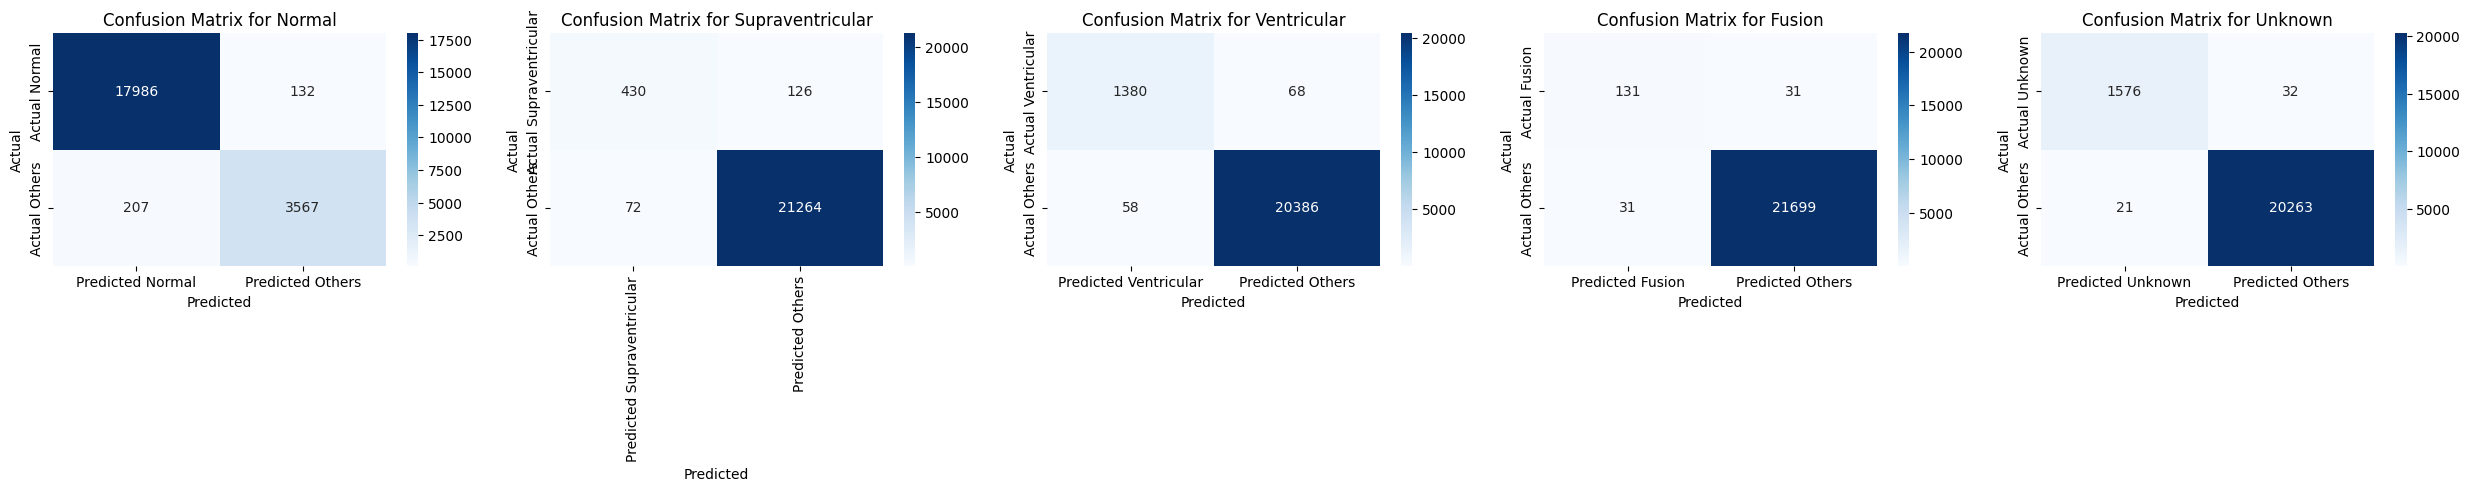

In [ ]:
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Create subplots for individual confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, label in enumerate(class_labels):
    # Create a binary confusion matrix for the current class
    binary_cm = np.array([
        [cm[i, i], sum(cm[i, :]) - cm[i, i]],
        [sum(cm[:, i]) - cm[i, i], sum(sum(cm)) - (sum(cm[i, :]) + sum(cm[:, i]) - cm[i, i])]
    ])

    # Plot the confusion matrix
    sns.heatmap(binary_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted ' + label, 'Predicted Others'],
                yticklabels=['Actual ' + label, 'Actual Others'],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Weights: [1.46439349e-01 2.72287358e+00 3.02536282e+00 7.87710301e+00
 2.73179407e+03]

In [ ]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y = y_train
)

for i in range(len(classes_weights)):
  # N
  if classes_weights[i] < 1:
    classes_weights[i] = classes_weights[i]/1.65
  # Q
  elif classes_weights[i] > 1 and classes_weights[i] < 3:
    classes_weights[i] = classes_weights[i]
  # V
  elif classes_weights[i] > 3 and classes_weights[i] < 5:
    classes_weights[i] = classes_weights[i]
  # S
  elif classes_weights[i] > 5 and classes_weights[i] < 10:
    classes_weights[i] = classes_weights[i]
  # F
  else:
    classes_weights[i] = classes_weights[i]*100

print(np.unique(classes_weights))

[1.46439349e-01 2.72287358e+00 3.02536282e+00 7.87710301e+00
 2.73179407e+03]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(learning_rate=0.1, max_depth=9, n_estimators=200)

xgb.fit(X_train, y_train, sample_weight = classes_weights)

y_test_pred = xgb.predict(X_test)

accuracy_score(y_test, y_test_pred, normalize=True)

0.9788964005116024

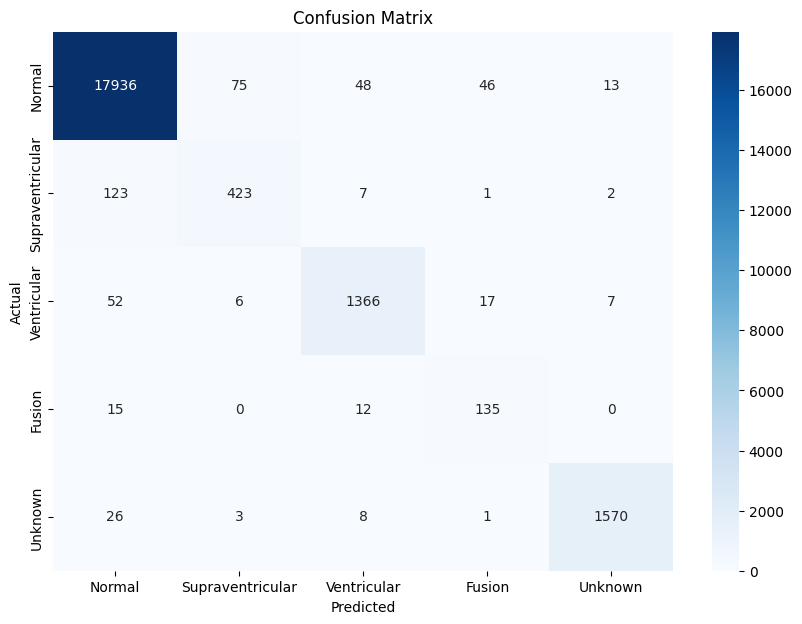

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

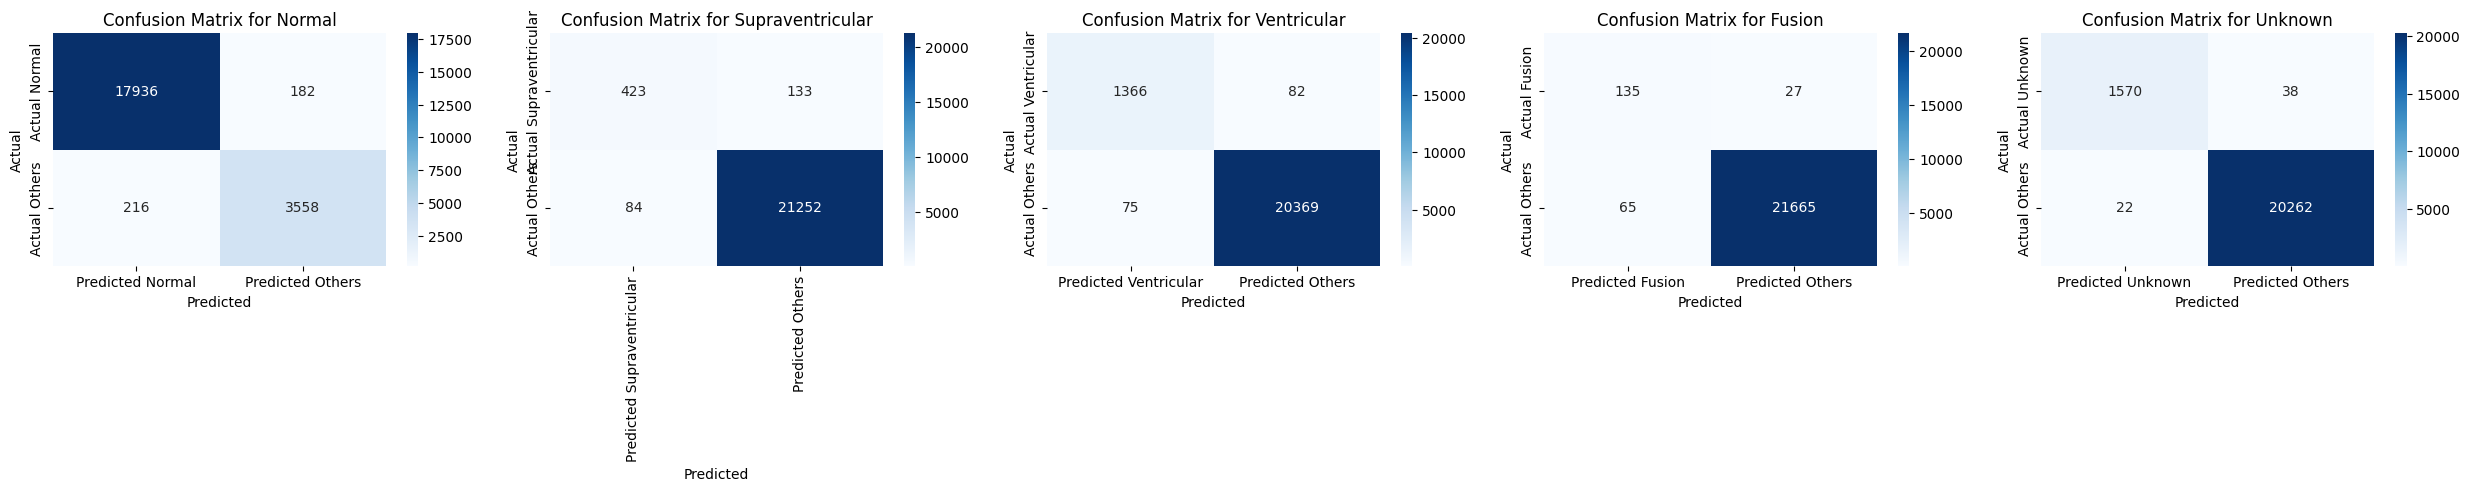

In [ ]:
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Create subplots for individual confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, label in enumerate(class_labels):
    # Create a binary confusion matrix for the current class
    binary_cm = np.array([
        [cm[i, i], sum(cm[i, :]) - cm[i, i]],
        [sum(cm[:, i]) - cm[i, i], sum(sum(cm)) - (sum(cm[i, :]) + sum(cm[:, i]) - cm[i, i])]
    ])

    # Plot the confusion matrix
    sns.heatmap(binary_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted ' + label, 'Predicted Others'],
                yticklabels=['Actual ' + label, 'Actual Others'],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Weights: [ 0.14643935  2.72287358  6.05072564 15.75420603 54.63588144]

In [ ]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y = y_train
)

for i in range(len(classes_weights)):
  # N
  if classes_weights[i] < 1:
    classes_weights[i] = classes_weights[i]/1.65
  # Q
  elif classes_weights[i] > 1 and classes_weights[i] < 3:
    classes_weights[i] = classes_weights[i]
  # V
  elif classes_weights[i] > 3 and classes_weights[i] < 5:
    classes_weights[i] = classes_weights[i]*2
  # S
  elif classes_weights[i] > 5 and classes_weights[i] < 10:
    classes_weights[i] = classes_weights[i]*2
  # F
  else:
    classes_weights[i] = classes_weights[i]*2

print(np.unique(classes_weights))

[ 0.14643935  2.72287358  6.05072564 15.75420603 54.63588144]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(learning_rate=0.1, max_depth=9, n_estimators=200)

xgb.fit(X_train, y_train, sample_weight = classes_weights)

y_test_pred = xgb.predict(X_test)

accuracy_score(y_test, y_test_pred, normalize=True)

0.9809519459163165

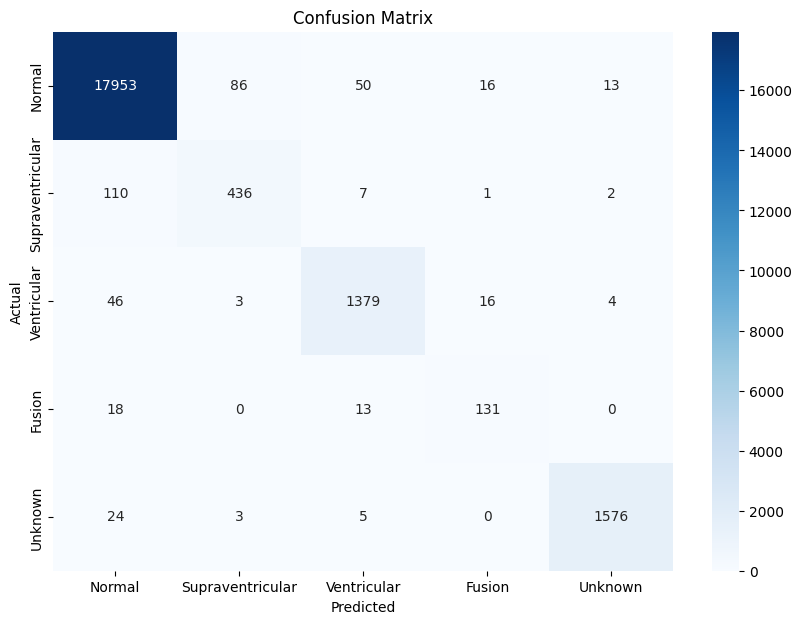

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

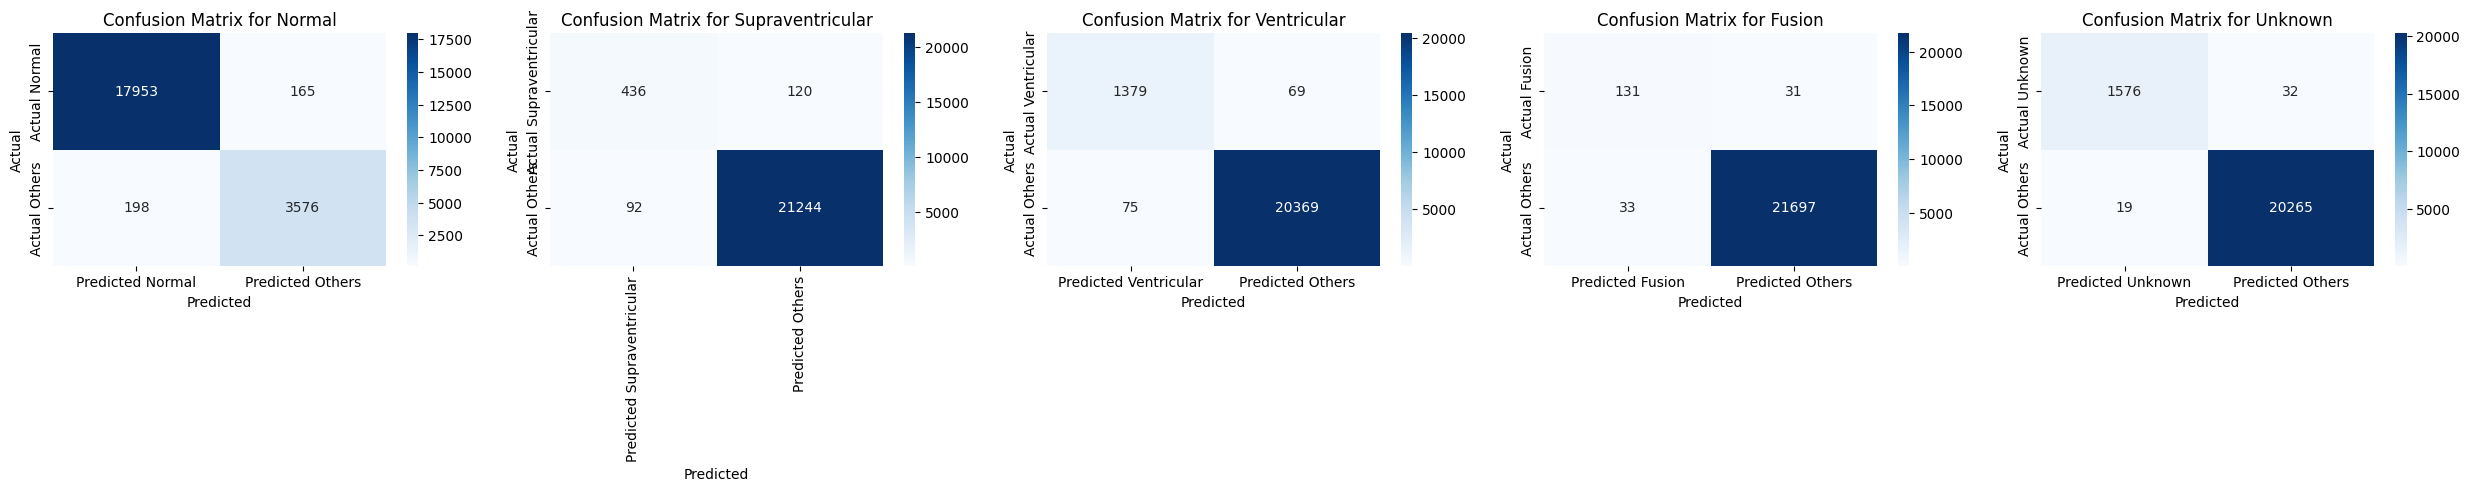

In [ ]:
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Create subplots for individual confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, label in enumerate(class_labels):
    # Create a binary confusion matrix for the current class
    binary_cm = np.array([
        [cm[i, i], sum(cm[i, :]) - cm[i, i]],
        [sum(cm[:, i]) - cm[i, i], sum(sum(cm)) - (sum(cm[i, :]) + sum(cm[:, i]) - cm[i, i])]
    ])

    # Plot the confusion matrix
    sns.heatmap(binary_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted ' + label, 'Predicted Others'],
                yticklabels=['Actual ' + label, 'Actual Others'],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Weights: [  0.14643935   2.72287358  15.1268141   15.75420603 109.27176287]


In [ ]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y = y_train
)

for i in range(len(classes_weights)):
  # N
  if classes_weights[i] < 1:
    classes_weights[i] = classes_weights[i]/1.65
  # Q
  elif classes_weights[i] > 1 and classes_weights[i] < 3:
    classes_weights[i] = classes_weights[i]
  # V
  elif classes_weights[i] > 3 and classes_weights[i] < 5:
    classes_weights[i] = classes_weights[i]*5
  # S
  elif classes_weights[i] > 5 and classes_weights[i] < 10:
    classes_weights[i] = classes_weights[i]*2
  # F
  else:
    classes_weights[i] = classes_weights[i]*4

print(np.unique(classes_weights))

[  0.14643935   2.72287358  15.1268141   15.75420603 109.27176287]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(learning_rate=0.1, max_depth=9, n_estimators=200)

xgb.fit(X_train, y_train, sample_weight = classes_weights)

y_test_pred = xgb.predict(X_test)

accuracy_score(y_test, y_test_pred, normalize=True)

0.9804038004750594

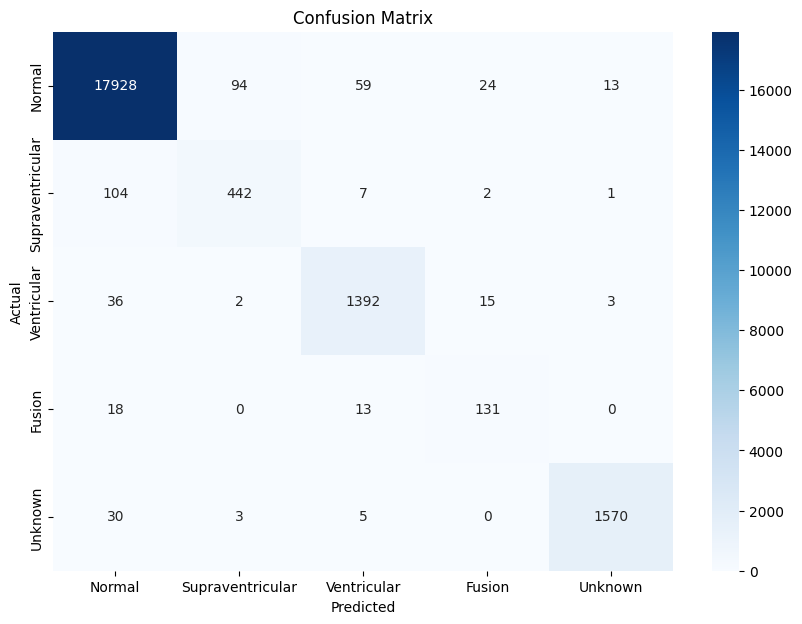

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

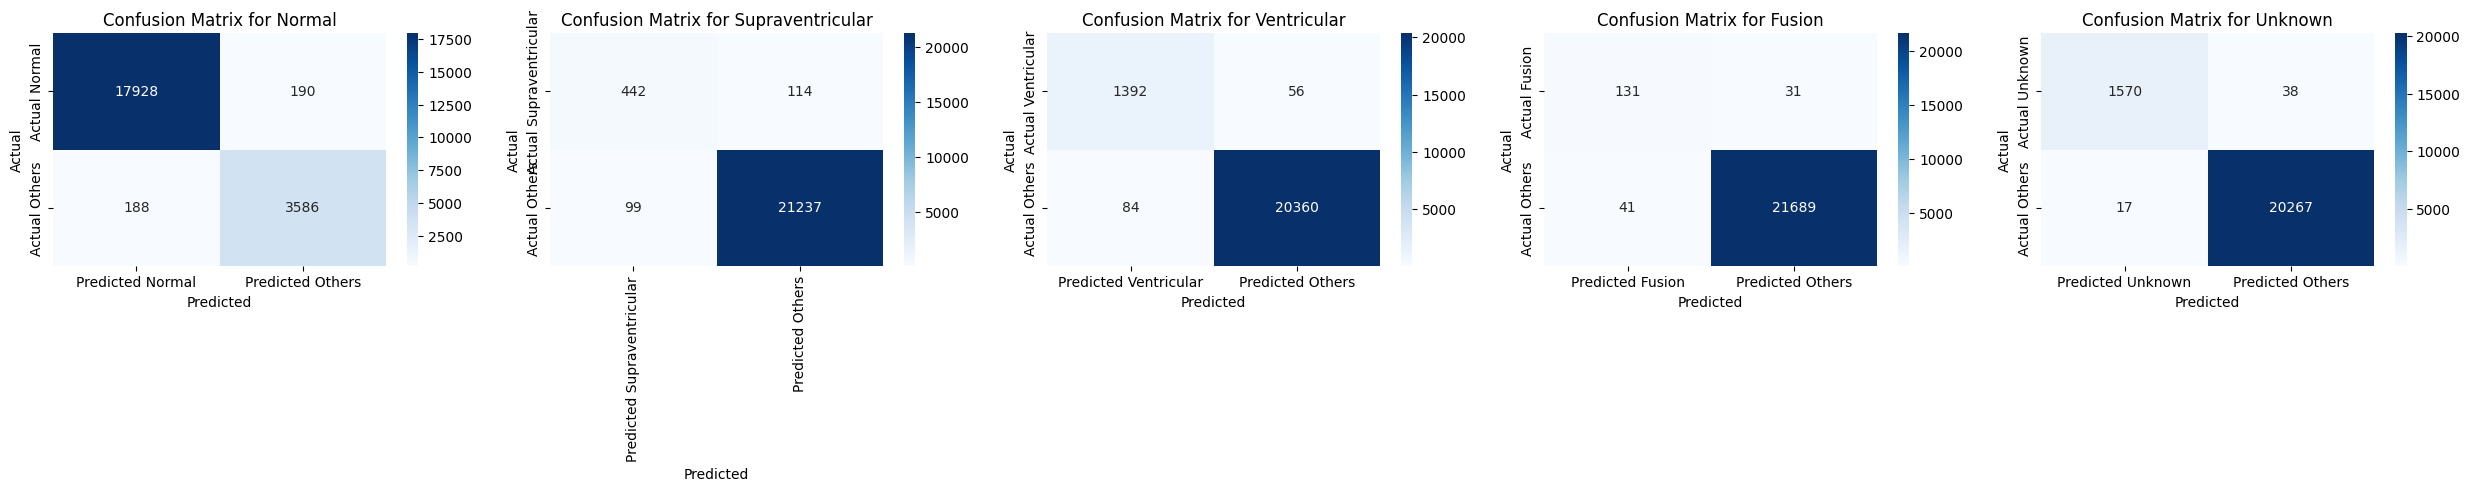

In [ ]:
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Create subplots for individual confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, label in enumerate(class_labels):
    # Create a binary confusion matrix for the current class
    binary_cm = np.array([
        [cm[i, i], sum(cm[i, :]) - cm[i, i]],
        [sum(cm[:, i]) - cm[i, i], sum(sum(cm)) - (sum(cm[i, :]) + sum(cm[:, i]) - cm[i, i])]
    ])

    # Plot the confusion matrix
    sns.heatmap(binary_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted ' + label, 'Predicted Others'],
                yticklabels=['Actual ' + label, 'Actual Others'],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Weights: [  0.14643935   2.72287358   3.02536282  15.75420603 109.27176287]


In [ ]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y = y_train
)

for i in range(len(classes_weights)):
  # N
  if classes_weights[i] < 1:
    classes_weights[i] = classes_weights[i]/1.65
  # Q
  elif classes_weights[i] > 1 and classes_weights[i] < 3:
    classes_weights[i] = classes_weights[i]
  # V
  elif classes_weights[i] > 3 and classes_weights[i] < 5:
    classes_weights[i] = classes_weights[i]
  # S
  elif classes_weights[i] > 5 and classes_weights[i] < 10:
    classes_weights[i] = classes_weights[i]*2
  # F
  else:
    classes_weights[i] = classes_weights[i]*4

print(np.unique(classes_weights))

[  0.14643935   2.72287358   3.02536282  15.75420603 109.27176287]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(learning_rate=0.1, max_depth=9, n_estimators=200)

xgb.fit(X_train, y_train, sample_weight = classes_weights)

y_test_pred = xgb.predict(X_test)

accuracy_score(y_test, y_test_pred, normalize=True)

0.9814087337840307

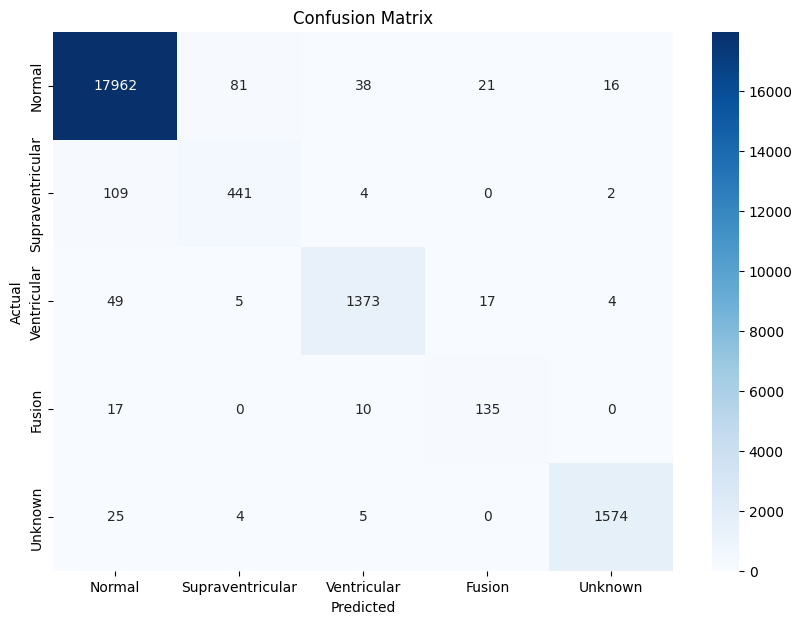

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

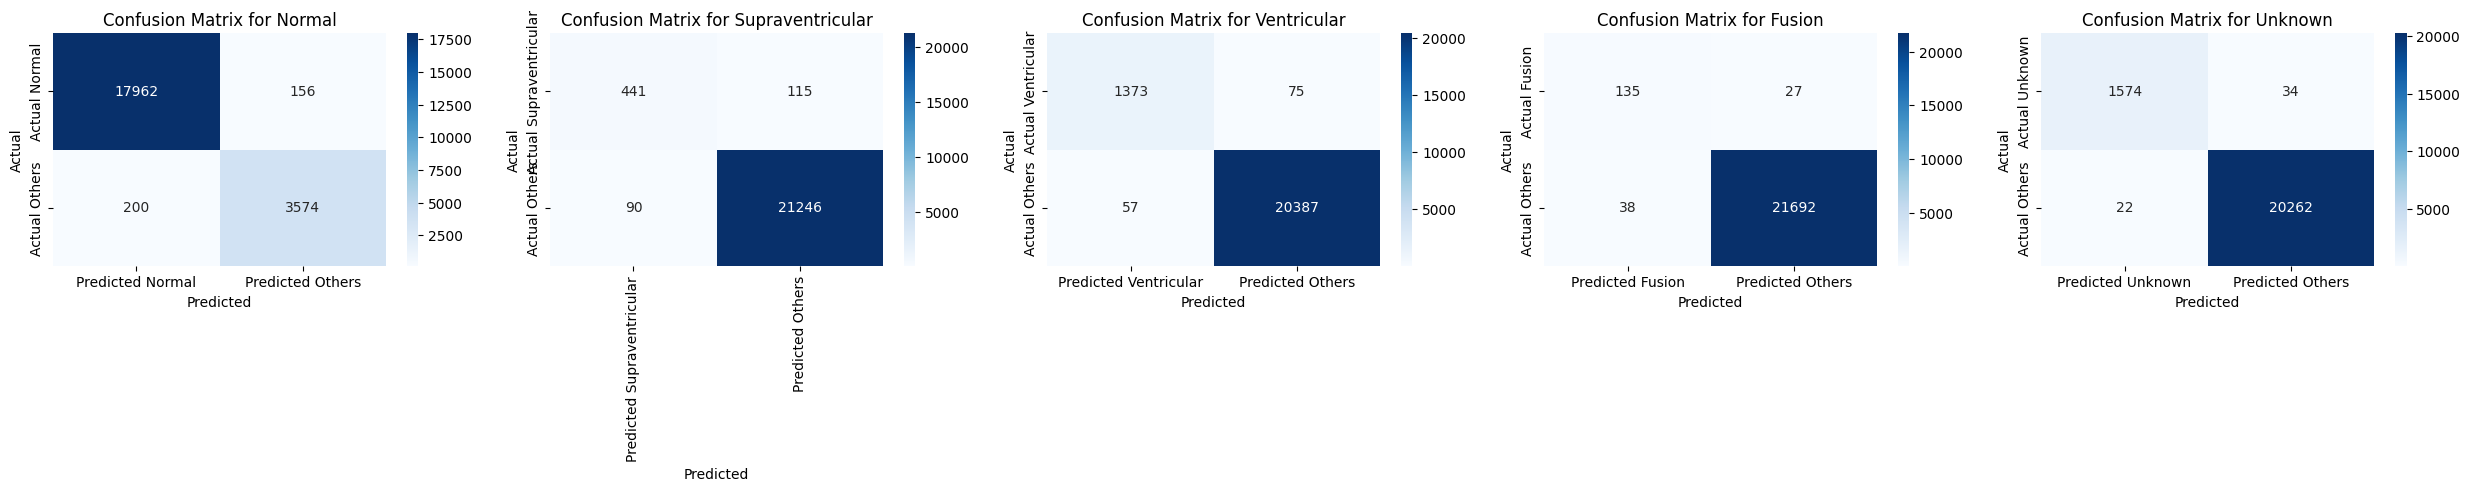

In [ ]:
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Define the class labels
class_labels = ['Normal', 'Supraventricular', 'Ventricular', 'Fusion', 'Unknown']

# Create subplots for individual confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, label in enumerate(class_labels):
    # Create a binary confusion matrix for the current class
    binary_cm = np.array([
        [cm[i, i], sum(cm[i, :]) - cm[i, i]],
        [sum(cm[:, i]) - cm[i, i], sum(sum(cm)) - (sum(cm[i, :]) + sum(cm[:, i]) - cm[i, i])]
    ])

    # Plot the confusion matrix
    sns.heatmap(binary_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted ' + label, 'Predicted Others'],
                yticklabels=['Actual ' + label, 'Actual Others'],
                ax=axes[i])
    axes[i].set_title(f'Confusion Matrix for {label}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Create Oversampling for the training set

Allows the training set to have more "balanced" training data.

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train_res, y_train_res = smt.fit_resample(X_train, y_train)

NameError: name 'X_train' is not defined

### Utilize Grid Search to find optimized parameters for the SMOTE data

**Description:
- We import necessary libraries and create a dictionary of models and their corresponding parameter grids.
- We create a Pipeline for each model that includes data scaling (StandardScaler) and the classifier.
- We perform a grid search (GridSearchCV) for each model using cross-validation (cv=5) and accuracy as the scoring metric.
- We fit the grid search to the data and store the results, including the best score and best parameters for each model.
- Finally, we print the results in a DataFrame for easy comparison.

Courtesey of ChatGPT

\

#### Change course of direction for checking
Rather than checking for accurately detecting the heartbeats, we decided to check for recall. This would allow the program to find the models that would have the least amount of false negatives. This is more important than accuracy since it is more dangerous in having false negatives than incorrectly diagnosing a patient that has a life threatening issue.

- Stratify: keeps the proportions of the sample set throughout the testing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Example models and parameter grids
models = {
    'logistic_regression': LogisticRegression(max_iter=1000),  # Increased max_iter
    'random_forest': RandomForestClassifier(),
    'svc': SVC(),
    'gradient_boosting': GradientBoostingClassifier(),
    'knn': KNeighborsClassifier()
}

param_grids = {
    'logistic_regression': {
        'classifier__penalty': ['l2'],
        'classifier__C': [1, 10, 100],
        'classifier__solver': ['lbfgs']
    },
    'random_forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'svc': {
        'classifier__C': [1, 10, 100],
        'classifier__gamma': [1, 0.1, 0.01, 0.001],
        'classifier__kernel': ['rbf']
    },
    'gradient_boosting': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.5],
        'classifier__max_depth': [3, 5, 7]
    },
    'knn': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }
}

# Create a list to store the grid search results
grid_search_results = []

for model_name in models:
    print(f"Running GridSearchCV for {model_name}...")

    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', models[model_name])
    ])

    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grids[model_name],
                               cv=5,
                               scoring='recall',
                               n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train_res, y_train_res)

    # Store the results
    grid_search_results.append({
        'model': model_name,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    })

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search_results)
print(results_df)


Running GridSearchCV for logistic_regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Running GridSearchCV for random_forest...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

## Developing Training Models

### Grid Search to find best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Random Forest Classifier

In [ ]:
# Define parameter grid

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

 Logisitic Regression

In [ ]:
lr = LogisticRegression()

param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', None],
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best Parameters: {grid_search.best_params_}')

NameError: name 'X_train' is not defined

## Research on the Heart beats

N: Non-ectopic beats (normal beat)
Description: These are regular heartbeats that follow the normal rhythm and pattern of the heart.
Health Implications: Normal beats indicate a healthy heart rhythm without any irregularities.
Rating: Good
Reason: Normal heartbeats are ideal and indicate a well-functioning heart.

S: Supraventricular ectopic beats
Description: These are premature beats that originate from the atria (the upper chambers of the heart). They can occur occasionally and are often perceived as a skipped or extra beat.
Health Implications: While usually benign, frequent supraventricular ectopic beats can be associated with atrial fibrillation or other atrial arrhythmias. They can cause palpitations or a feeling of fluttering in the chest.
Rating: Moderate
Reason: These are generally not life-threatening but can be uncomfortable and sometimes indicate underlying atrial issues.

V: Ventricular ectopic beats
Description: These are premature beats that originate from the ventricles (the lower chambers of the heart). They are often perceived as a stronger or different type of heartbeat.
Health Implications: Ventricular ectopic beats are more concerning than supraventricular beats. They can indicate underlying heart disease, especially if they occur frequently. In some cases, they can lead to ventricular tachycardia or fibrillation, which are serious conditions.
Rating: Bad
Reason: These are more serious and can be indicative of significant heart problems.

F: Fusion Beats
Description: Fusion beats occur when a normal beat and a ventricular ectopic beat occur simultaneously, resulting in a combination of the two types of beats.
Health Implications: Fusion beats can indicate the presence of ventricular ectopic activity. While they themselves may not cause symptoms, their presence suggests an underlying ectopic activity that could be problematic.
Rating: Moderate to Bad
Reason: Fusion beats are less common and typically occur in the presence of other ectopic beats, which can indicate underlying heart issues.

Q: Unknown Beats
Description: These are beats that do not clearly fit into any of the other categories. Their exact origin and significance are unclear without further investigation.
Health Implications: The health implications of unknown beats can vary widely. They may be benign or could indicate an abnormal rhythm that requires further investigation.
Rating: Unknown
Reason: Without knowing the exact nature of these beats, it's difficult to determine their impact on health. They require further evaluation to understand their significance.

Summary
From good to bad, the heartbeats can be rated as follows:

N: Non-ectopic beats (normal beat) - Good
S: Supraventricular ectopic beats - Moderate
F: Fusion Beats - Moderate to Bad
V: Ventricular ectopic beats - Bad
Q: Unknown Beats - Unknown (requires further investigation)

## Approaches to Classification

## Multi Class Classificiation on the five categories

- If we ignore the fifth class, then the machine might try to assign the unknown into one of the categories

## Classification of the First four heartbeats

- If we look at the first four heartbeats, the machine can find out how to categorize the heartbeats according to them. If it finds a pattern that is not one of the categories, it can assign it to the unknown.

### SMOTE Processing Update

- level out data at the level of the unknown identifier
- cut normal identifier to the number of unknown identifier

# Task 3

Dataset: https://library.ucsd.edu/dc/object/bb29449106

### Load modules and preprocessing

In [ ]:
import os
%cd /content/drive/Shareddrives/LLNL_DataScience/data_3_4
print('The working directory is :{}'.format(os.getcwd()))

/content/drive/Shareddrives/LLNL_DataScience/data_3_4
The working directory is :/content/drive/Shareddrives/LLNL_DataScience/data_3_4


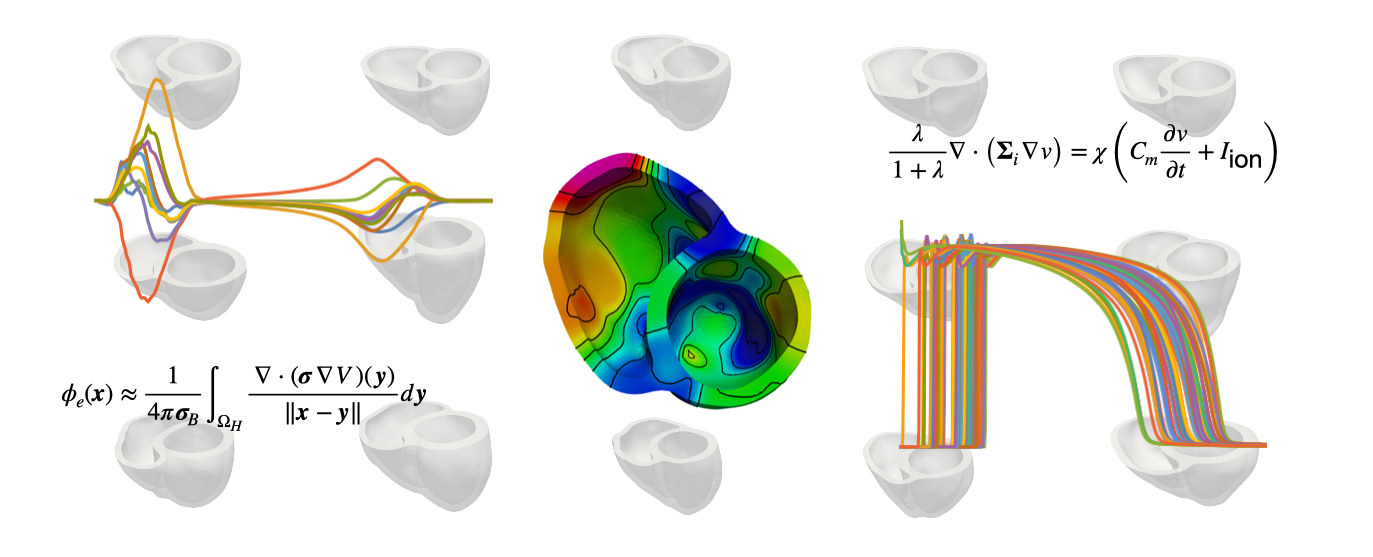

In [ ]:
# Import image module
from IPython.display import Image
# Get the image
Image(filename='/content/drive/Shareddrives/LLNL_DataScience/data_3_4/figures/banner.png')

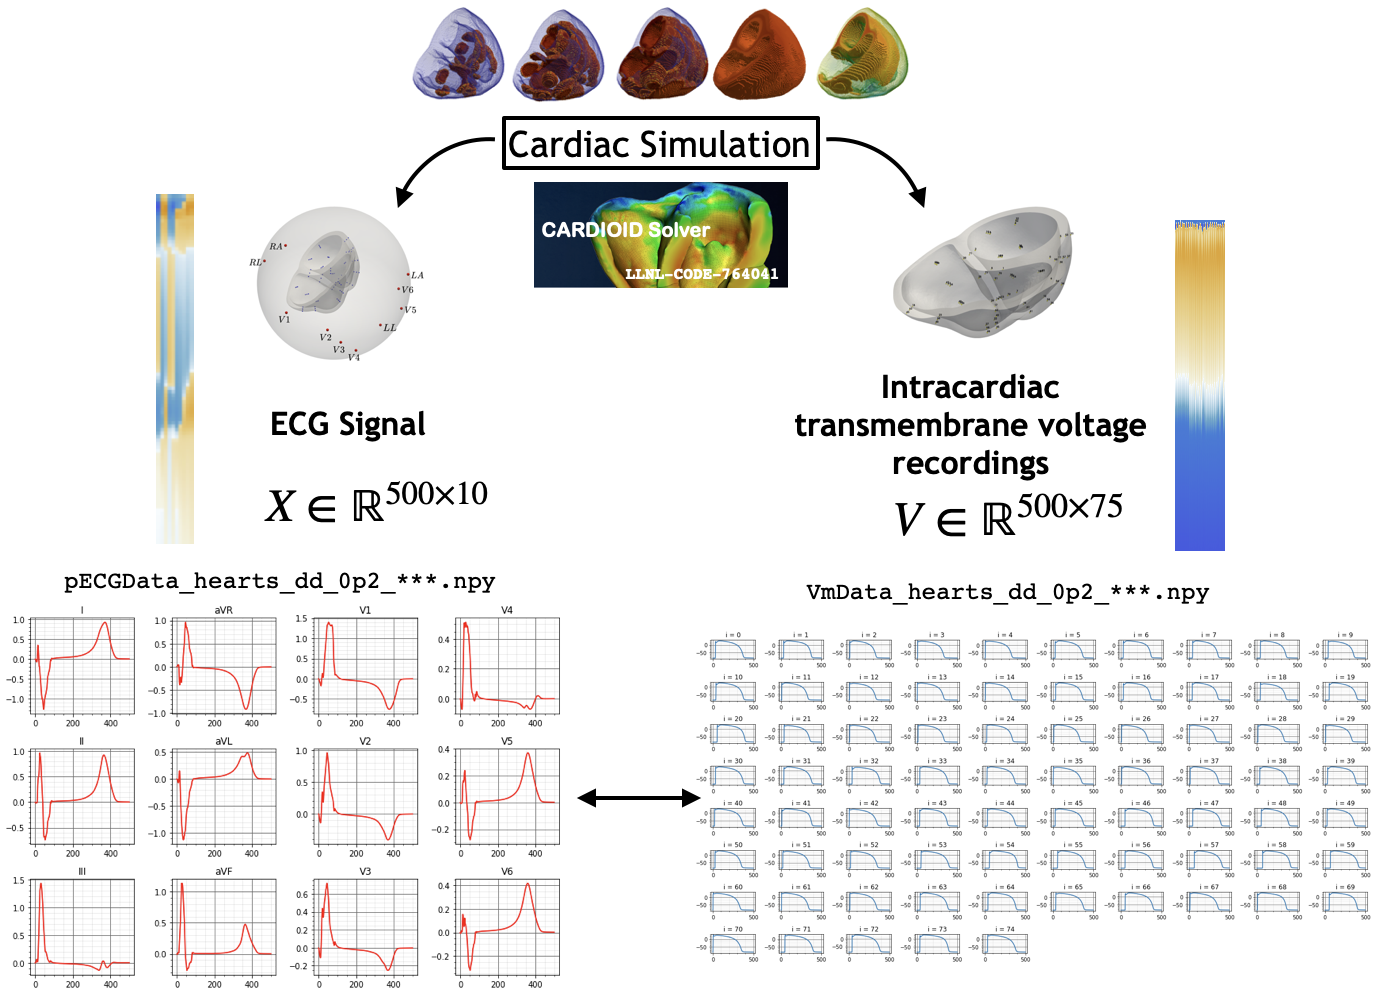

In [ ]:
# Import image module
from IPython.display import Image
# Get the image
Image(filename='/content/drive/Shareddrives/LLNL_DataScience/data_3_4/figures/dataset_gen_illustration.png')

In [ ]:
# Import image module
from IPython.display import Image
# Get the image
Image(filename='/content/drive/Shareddrives/LLNL_DataScience/data_3_4/figures/rotating_hearts.gif')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Shareddrives/LLNL_DataScience/data_3_4/figures/rotating_hearts.gif'

In [ ]:
import sys
print("Python is in %s" % sys.executable)
print("Python version is %s.%s.%s" % sys.version_info[:3])
import glob
import re, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

Python is in /usr/bin/python3
Python version is 3.10.12


Read the data numpy arrays

In [ ]:
# def read_data_dirs(dirs_names, verbose = 0):

#     file_pairs = []

#     for dir in dirs_names:
#         all_files = sorted(glob.glob(dir + '/*.npy'))
#         files_Vm=[]
#         files_pECG=[]

#         if verbose > 0:
#             print('Reading files...',end='')
#         for file in all_files:
#             if 'VmData' in file:
#                 files_Vm.append(file)
#             if 'pECGData' in file:
#                 files_pECG.append(file)
#         if verbose > 0:
#             print(' done.')

#         if verbose > 0:
#             print('len(files_pECG) : {}'.format(len(files_pECG)))
#             print('len(files_Vm) : {}'.format(len(files_Vm)))

#         # Check if both lists have elements before proceeding
#         if len(files_pECG) > 0 and len(files_Vm) > 0:
#             # Ensure that you only iterate over the shared indices of both lists
#             for i in range(min(len(files_pECG), len(files_Vm))):
#                 VmName =  files_Vm[i]
#                 VmName = VmName.replace('VmData', '')
#                 pECGName =  files_pECG[i]
#                 pECGName = pECGName.replace('pECGData', '')
#                 if pECGName == VmName :
#                     file_pairs.append([files_pECG[i], files_Vm[i]])
#                 else:
#                     print('Automatic sorted not matching, looking for pairs ...',end='')
#                     for j in range(len(files_Vm)):
#                         VmName =  files_Vm[j]
#                         VmName = VmName.replace('VmData', '')
#                         if pECGName == VmName :
#                             file_pairs.append([files_pECG[i], files_Vm[j]])
#                     print('done.')
#     return file_pairs

Method does not work, changed to get a working set

In [ ]:
 def read_data_dirs(dirs_names, verbose = 0):

     file_pairs = []

     for dir in dirs_names:
         all_files = sorted(glob.glob(dir + '/*.npy'))
         files_Vm=[]
         files_pECG=[]

         if verbose > 0:
             print('Reading files...',end='')
         for file in all_files:
             if 'VmData' in file:
                 files_Vm.append(file)
             if 'pECGData' in file:
                 files_pECG.append(file)
         if verbose > 0:
             print(' done.')

         if verbose > 0:
             print('len(files_pECG) : {}'.format(len(files_pECG)))
             print('len(files_Vm) : {}'.format(len(files_Vm)))

         for i in range(len(files_pECG)):
             VmName =  files_Vm[i]
             VmName = VmName.replace('VmData', '')
             pECGName =  files_pECG[i]
             pECGName = pECGName.replace('pECGData', '')
             if pECGName == VmName :
                file_pairs.append([files_pECG[i], files_Vm[i]])
             else:
                 print('Automatic sorted not matching, looking for pairs ...',end='')
                 for j in range(len(files_Vm)):
                     VmName =  files_Vm[j]
                     VmName = VmName.replace('VmData', '')
                     if pECGName == VmName :
                         file_pairs.append([files_pECG[i], files_Vm[j]])
                 print('done.')
     return file_pairs

### Load dataset

In [ ]:
data_dirs = []
regex = r'data_hearts_dd_0p2*'
for x in os.listdir('./'):
    if re.match(regex, x):
        data_dirs.append(x)

file_pairs = read_data_dirs(data_dirs, verbose=1)
len(file_pairs)

Reading files... done.
len(files_pECG) : 435
len(files_Vm) : 435
Reading files... done.
len(files_pECG) : 870
len(files_Vm) : 870
Reading files... done.
len(files_pECG) : 699
len(files_Vm) : 699
Reading files... done.
len(files_pECG) : 1040
len(files_Vm) : 1040
Reading files... done.
len(files_pECG) : 870
len(files_Vm) : 870
Reading files... done.
len(files_pECG) : 1040
len(files_Vm) : 1040
Reading files... done.
len(files_pECG) : 870
len(files_Vm) : 870
Reading files... done.
len(files_pECG) : 699
len(files_Vm) : 722
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic sorted not matching, looking for pairs ...done.
Automatic so

16117

### Plot one simulation

16117 Cases

In [ ]:
row = 3; column = 4
scaling_ecg = "none"
plt.figure(figsize=(10, 7))
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]

row = 3; column = 4
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12}

index = np.random.choice(range(len(file_pairs)),1)
index = [213]

for case in index:

    print('Case {} : {}'.format(case, file_pairs[case][0]))
    pECGData = np.load(file_pairs[case][0])
    VmData = np.load(file_pairs[case][1])

    dataECG = torch.Tensor(pECGData)               # dataECG  : RA LA LL RL V1 V2 V3 V4 V5 V6
    ecg12aux = torch.zeros(dataECG.shape[0],12)    # ecg12aux : i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5, v6
    WilsonLead = 0.33333333 * (dataECG[:,0] + dataECG[:,1] + dataECG[:,2])
    # Lead I: LA - RA
    ecg12aux[:,0] = dataECG[:,1] - dataECG[:,0]
    # Lead II: LL - RA
    ecg12aux[:,1] = dataECG[:,2] - dataECG[:,0]
    # Lead III: LL - LA
    ecg12aux[:,2] = dataECG[:,2] - dataECG[:,1]
    # Lead aVR: 3/2 (RA - Vw)
    ecg12aux[:,3] = 1.5*(dataECG[:,0] - WilsonLead)
    # Lead aVL: 3/2 (LA - Vw)
    ecg12aux[:,4] = 1.5*(dataECG[:,1] - WilsonLead)
    # Lead aVF: 3/2 (LL - Vw)
    ecg12aux[:,5] = 1.5*(dataECG[:,2] - WilsonLead)
    # Lead V1: V1 - Vw
    ecg12aux[:,6] = dataECG[:,4] - WilsonLead
    # Lead V2: V2 - Vw
    ecg12aux[:,7] = dataECG[:,5] - WilsonLead
    # Lead V3: V3 - Vw
    ecg12aux[:,8] = dataECG[:,6] - WilsonLead
    # Lead V4: V4 - Vw
    ecg12aux[:,9] = dataECG[:,7] - WilsonLead
    # Lead V5: V5 - Vw
    ecg12aux[:,10] = dataECG[:,8] - WilsonLead
    # Lead V6: V6 - Vw
    ecg12aux[:,11] = dataECG[:,9] - WilsonLead
    pECGData = ecg12aux

    for i in range(pECGData.shape[1]):
        plt.subplot(row, column, reorder[i + 1])
        plt.plot(pECGData[0:500,i],'r')
        plt.title(titles[i])
        plt.grid(visible=True, which='major', color='#666666', linestyle='-')
        plt.minorticks_on()
        plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
        #plt.xlabel('msec')
        #plt.ylabel('mV')
    plt.tight_layout()
    plt.show()

ValueError: 'a' cannot be empty unless no samples are taken

<Figure size 1000x700 with 0 Axes>

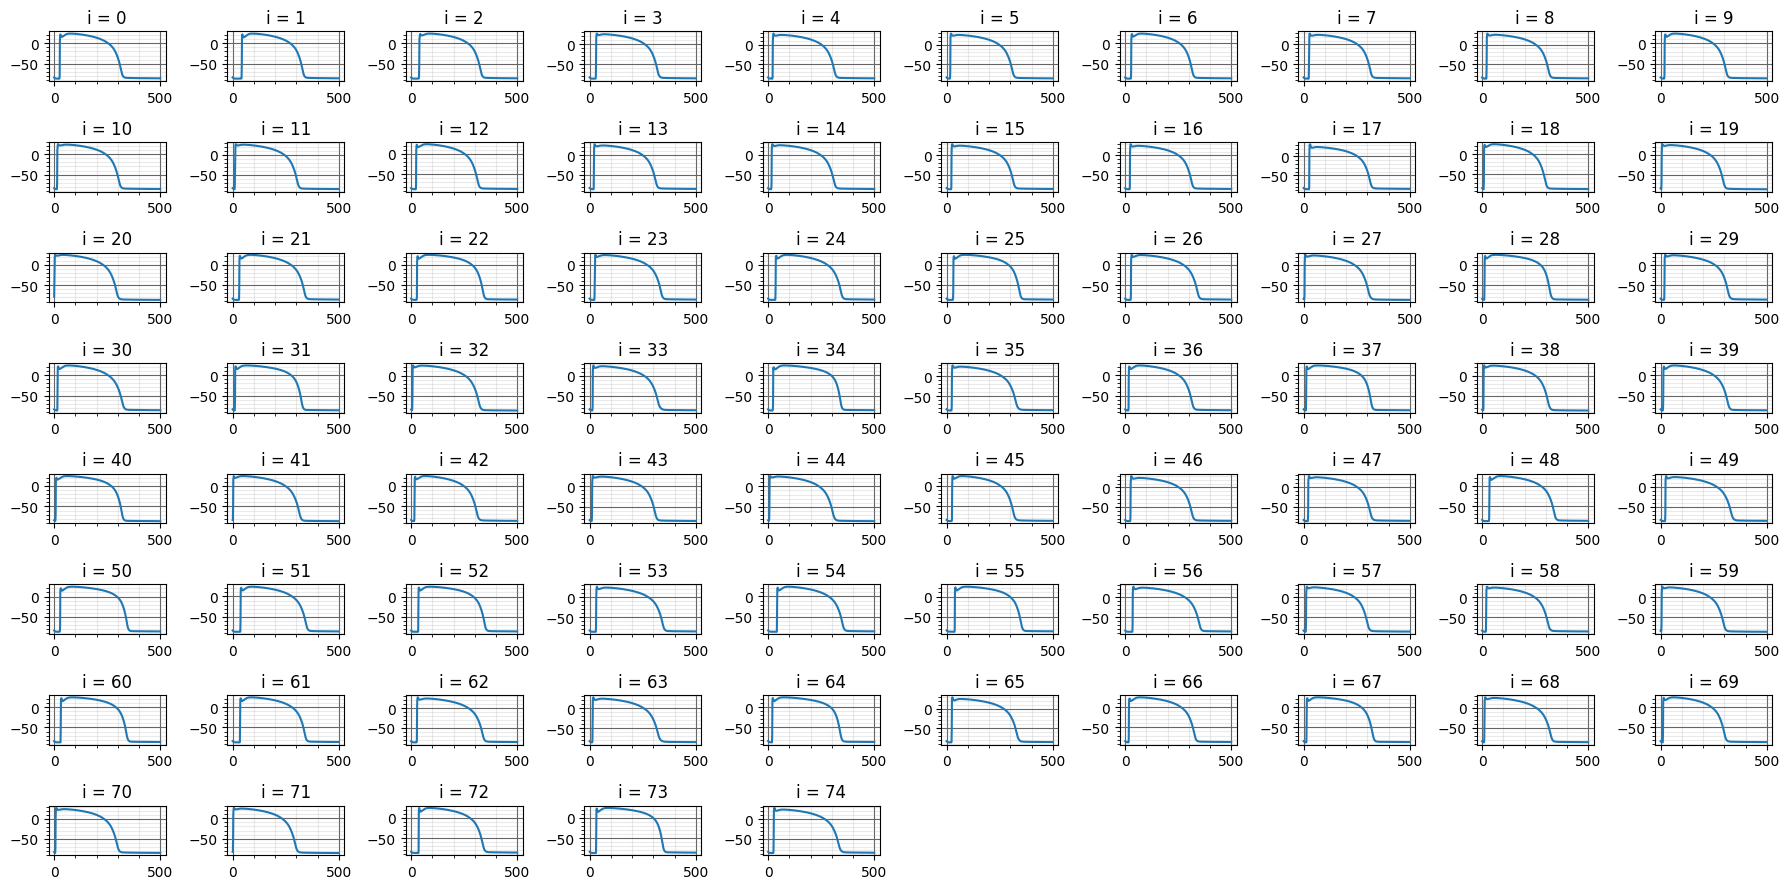

In [ ]:
num_timesteps = 500
plt.figure(figsize=(18, 9))
row = 7; column = 10

index = np.random.choice(range(len(file_pairs)),1)
index = [213]

for case in index:
    VmData = np.load(file_pairs[case][1])
    randomIndex = range(VmData.shape[1])
    for count, i in enumerate(randomIndex):
        plt.subplot(8, 10, count + 1)
        plt.plot(VmData[0:num_timesteps,i])
        plt.title(f'i = {i}')
        plt.grid(visible=True, which='major', color='#666666', linestyle='-')
        plt.minorticks_on()
        plt.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

### Processing Images

Preparing Data

Store ecg into dataframe

In [ ]:
import pandas as pd
import numpy as np

columns = ['Lead I', 'Lead II', 'Lead III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
df_ecg = pd.DataFrame(ecg12aux, columns=columns)
print(case)

11111


In [ ]:
df_ecg.shape

(500, 12)

In [ ]:
df_ecg.head()

Lead I   Lead II  Lead III       aVR       aVL       aVF        V1  \
0 -0.002125 -0.002426 -0.000301  0.002276 -0.000912 -0.001364 -0.001048   
1 -0.005550 -0.003180  0.002370  0.004365 -0.003960 -0.000405 -0.001091   
2 -0.007070 -0.003939  0.003130  0.005505 -0.005100 -0.000405 -0.003511   
3 -0.005984 -0.004484  0.001500  0.005234 -0.003742 -0.001492 -0.007866   
4 -0.011451 -0.005790  0.005661  0.008621 -0.008556 -0.000064 -0.011485   

         V2        V3        V4        V5        V6  
0 -0.001877 -0.001777 -0.001528 -0.001115 -0.001069  
1 -0.002548 -0.002283 -0.001773 -0.001515 -0.001201  
2 -0.005312 -0.004591 -0.003452 -0.002112 -0.001321  
3 -0.010037 -0.008629 -0.006589 -0.003152 -0.001565  
4 -0.015272 -0.013084 -0.009842 -0.003975 -0.000839

In [ ]:
df_ecg.describe()

Lead I     Lead II    Lead III         aVR         aVL         aVF  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean    -0.006105    0.016301    0.022406   -0.005098   -0.014256    0.019353   
std      0.302948    0.200138    0.210406    0.234198    0.240853    0.138631   
min     -0.978535   -0.762227   -0.176354   -0.433327   -0.997856   -0.348040   
25%      0.002448    0.004002   -0.041658   -0.072950    0.001084   -0.010699   
50%      0.027772    0.012022   -0.015991   -0.020295    0.021034   -0.002325   
75%      0.087329    0.058338   -0.003623   -0.001883    0.065671    0.023726   
max      0.490134    0.399804    1.047893    0.857386    0.302313    0.609864   

               V1          V2          V3          V4          V5          V6  
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000  
mean     0.019783    0.006270    0.004645    0.004399    0.006093    0.007559  
std      0.322315    0.188634    0.147664    0.113108    0.075555    0.090373  
min     -0.429179   -0.241481   -0.171290   -0.104197   -0.279436   -0.319804  
25%     -0.095435   -0.066813   -0.054060   -0.040268    0.000990    0.001851  
50%     -0.033762   -0.024306   -0.019104   -0.016552    0.006969    0.012068  
75%     -0.003536   -0.003745   -0.003195   -0.005397    0.029084    0.040239  
max      1.021733    0.704416    0.530298    0.476505    0.143455    0.173690

In [ ]:
columns = list(range(75))
df_map = pd.DataFrame(VmData, columns=columns)

In [ ]:
df_map.shape

(500, 75)

In [ ]:
df_map.head()

0          1          2          3          4          5   \
0 -85.907831 -85.791215 -85.914470 -85.944526 -85.944531 -85.903884   
1 -85.902905 -85.791371 -85.915825 -85.944712 -85.944621 -85.898723   
2 -85.900843 -85.791578 -85.916424 -85.944859 -85.944711 -85.896867   
3 -85.899864 -85.791856 -85.916766 -85.944937 -85.944800 -85.896057   
4 -85.899371 -85.792186 -85.916995 -85.944979 -85.944889 -85.895681   

          6          7          8          9   ...         65         66  \
0 -85.791163 -85.912902 -85.944553 -85.944531  ... -85.934202 -85.866251   
1 -85.790822 -85.913818 -85.944517 -85.944621  ... -85.928257 -85.867419   
2 -85.790692 -85.914467 -85.944390 -85.944711  ... -85.925925 -85.867984   
3 -85.790873 -85.914892 -85.944261 -85.944800  ... -85.924826 -85.868361   
4 -85.791243 -85.915183 -85.944166 -85.944890  ... -85.924272 -85.868651   

          67         68         69         70         71         72  \
0 -85.934350 -85.791218 -85.791419 -85.931690 -85.940493 -85.902958   
1 -85.928465 -85.791422 -85.790763 -85.926593 -85.934410 -85.898591   
2 -85.926112 -85.791556 -85.790018 -85.947574 -85.931762 -85.896897   
3 -85.924995 -85.791604 -85.789761 -86.142650 -85.930442 -85.896119   
4 -85.924430 -85.791632 -85.789866 -82.082841 -85.929743 -85.895748   

          73         74  
0 -85.791258 -85.929109  
1 -85.791346 -85.924473  
2 -85.791295 -85.922719  
3 -85.791265 -85.921872  
4 -85.791290 -85.921432  

[5 rows x 75 columns]

In [ ]:
df_map

0          1          2          3          4          5   \
0   -85.907831 -85.791215 -85.914470 -85.944526 -85.944531 -85.903884   
1   -85.902905 -85.791371 -85.915825 -85.944712 -85.944621 -85.898723   
2   -85.900843 -85.791578 -85.916424 -85.944859 -85.944711 -85.896867   
3   -85.899864 -85.791856 -85.916766 -85.944937 -85.944800 -85.896057   
4   -85.899371 -85.792186 -85.916995 -85.944979 -85.944889 -85.895681   
..         ...        ...        ...        ...        ...        ...   
495 -85.268266 -84.844877 -85.490653 -85.550180 -85.561045 -85.293663   
496 -85.274987 -84.855253 -85.494850 -85.553985 -85.564725 -85.300003   
497 -85.281622 -84.865507 -85.498997 -85.557745 -85.568362 -85.306264   
498 -85.288172 -84.875641 -85.503094 -85.561461 -85.571956 -85.312446   
499 -85.294640 -84.885656 -85.507144 -85.565135 -85.575510 -85.318551   

            6          7          8          9   ...         65         66  \
0   -85.791163 -85.912902 -85.944553 -85.944531  ... -85.934202 -85.866251   
1   -85.790822 -85.913818 -85.944517 -85.944621  ... -85.928257 -85.867419   
2   -85.790692 -85.914467 -85.944390 -85.944711  ... -85.925925 -85.867984   
3   -85.790873 -85.914892 -85.944261 -85.944800  ... -85.924826 -85.868361   
4   -85.791243 -85.915183 -85.944166 -85.944890  ... -85.924272 -85.868651   
..         ...        ...        ...        ...  ...        ...        ...   
495 -84.915241 -85.297279 -85.375686 -85.415278  ... -85.213607 -84.974141   
496 -84.924779 -85.303883 -85.381638 -85.420742  ... -85.221346 -84.984114   
497 -84.934205 -85.310400 -85.387514 -85.426138  ... -85.228984 -84.993961   
498 -84.943521 -85.316834 -85.393315 -85.431466  ... -85.236524 -85.003685   
499 -84.952727 -85.323185 -85.399042 -85.436727  ... -85.243966 -85.013285   

            67         68         69         70         71         72  \
0   -85.934350 -85.791218 -85.791419 -85.931690 -85.940493 -85.902958   
1   -85.928465 -85.791422 -85.790763 -85.926593 -85.934410 -85.898591   
2   -85.926112 -85.791556 -85.790018 -85.947574 -85.931762 -85.896897   
3   -85.924995 -85.791604 -85.789761 -86.142650 -85.930442 -85.896119   
4   -85.924430 -85.791632 -85.789866 -82.082841 -85.929743 -85.895748   
..         ...        ...        ...        ...        ...        ...   
495 -85.403834 -85.004547 -84.554054 -85.467757 -85.118303 -85.218659   
496 -85.409139 -85.012895 -84.567738 -85.472237 -85.127410 -85.225945   
497 -85.414379 -85.021147 -84.581270 -85.476664 -85.136396 -85.233139   
498 -85.419554 -85.029304 -84.594649 -85.481039 -85.145263 -85.240241   
499 -85.424667 -85.037368 -84.607879 -85.485362 -85.154012 -85.247252   

            73         74  
0   -85.791258 -85.929109  
1   -85.791346 -85.924473  
2   -85.791295 -85.922719  
3   -85.791265 -85.921872  
4   -85.791290 -85.921432  
..         ...        ...  
495 -84.674642 -85.255287  
496 -84.686799 -85.262402  
497 -84.698820 -85.269428  
498 -84.710707 -85.276364  
499 -84.722460 -85.283212  

[500 rows x 75 columns]

CNN (convolutional neural networks) for image processing and training

Learn more: https://blog.paperspace.com/writing-cnns-from-scratch-in-pytorch/

Learn more about neural networks: https://www.youtube.com/watch?v=aircAruvnKk

Squeezenet architecture: https://arxiv.org/pdf/1602.07360v4

Loading Data

In [ ]:
scaling_ecg = "none"
titles = ["I", "II", "III", "aVR", "aVL", "aVF", "V1", "V2", "V3", "V4", "V5", "V6"]
reorder = {1:1,2:5,3:9,4:2,5:6,6:10,7:3,8:7,9:11,10:4,11:8,12:12}
all_ecg_data, all_vm_data = [], []

for case in range(len(file_pairs)):
    if case % 100 == 99 and case < 500:
        print('Case {} : {}'.format(case, file_pairs[case][0]))
    if case == 500:
        print('Processing the rest (Total > 16k)...')
    pECGData = np.load(file_pairs[case][0])
    VmData = np.load(file_pairs[case][1])

    dataECG = torch.Tensor(pECGData)               # dataECG  : RA LA LL RL V1 V2 V3 V4 V5 V6
    ecg12aux = torch.zeros(dataECG.shape[0],12)    # ecg12aux : i, ii, iii, avr, avl, avf, v1, v2, v3, v4, v5, v6
    WilsonLead = 0.33333333 * (dataECG[:,0] + dataECG[:,1] + dataECG[:,2])
    # Lead I: LA - RA
    ecg12aux[:,0] = dataECG[:,1] - dataECG[:,0]
    # Lead II: LL - RA
    ecg12aux[:,1] = dataECG[:,2] - dataECG[:,0]
    # Lead III: LL - LA
    ecg12aux[:,2] = dataECG[:,2] - dataECG[:,1]
    # Lead aVR: 3/2 (RA - Vw)
    ecg12aux[:,3] = 1.5*(dataECG[:,0] - WilsonLead)
    # Lead aVL: 3/2 (LA - Vw)
    ecg12aux[:,4] = 1.5*(dataECG[:,1] - WilsonLead)
    # Lead aVF: 3/2 (LL - Vw)
    ecg12aux[:,5] = 1.5*(dataECG[:,2] - WilsonLead)
    # Lead V1: V1 - Vw
    ecg12aux[:,6] = dataECG[:,4] - WilsonLead
    # Lead V2: V2 - Vw
    ecg12aux[:,7] = dataECG[:,5] - WilsonLead
    # Lead V3: V3 - Vw
    ecg12aux[:,8] = dataECG[:,6] - WilsonLead
    # Lead V4: V4 - Vw
    ecg12aux[:,9] = dataECG[:,7] - WilsonLead
    # Lead V5: V5 - Vw
    ecg12aux[:,10] = dataECG[:,8] - WilsonLead
    # Lead V6: V6 - Vw
    ecg12aux[:,11] = dataECG[:,9] - WilsonLead
    pECGData = ecg12aux
    all_ecg_data.append(pECGData.unsqueeze(2)) # UNSQUEEZE adds one more dimension
    all_vm_data.append(torch.Tensor(VmData).unsqueeze(2)) # UNSQUEEZE adds one more dimension

print("ECG data shape: ", pECGData.size())
print("VM data shape: ", torch.Tensor(VmData).size())

all_ecg_data = torch.cat(all_ecg_data, dim=2)
all_vm_data = torch.cat(all_vm_data, dim=2)

print("All ECG data shape: ", all_ecg_data.size())
print("All VM data shape: ", all_vm_data.size())

Case 99 : data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v13_pattern.2.npy
Case 199 : data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v16_pattern.6.npy
Case 299 : data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v5_pattern.17.npy
Case 399 : data_hearts_dd_0p2/pECGData_hearts_dd_0p2_volunteer.v8_pattern.3.npy
Case 499 : data_hearts_dd_0p2_geo_act_1_bcl/pECGData_hearts_dd_0p2_geo_act_1_bcl_bcl.1000.pattern.12.volunteer.v13.npy
Processing the rest (Total > 16k)...


KeyboardInterrupt: 

Design Squeeze Net Architecture

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Fire(nn.Module):
    def __init__(self, in_channel, squeeze_channel, expand_channel):
        super(Fire, self).__init__()
        self.squeeze = nn.Conv1d(in_channel, squeeze_channel, kernel_size=1)
        self.squeeze_activation = nn.ReLU(inplace=True)
        self.expand1x1 = nn.Conv1d(squeeze_channel, expand_channel, kernel_size=1)
        self.expand3x3 = nn.Conv1d(squeeze_channel, expand_channel, kernel_size=3, padding=1)
        self.expand_activation = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.squeeze_activation(self.squeeze(x))
        return self.expand_activation(torch.cat([
            self.expand1x1(x),
            self.expand3x3(x)
        ], 1))

class SqueezeNetECGtoVM(nn.Module):
    def __init__(self):
        super(SqueezeNetECGtoVM, self).__init__()
        self.conv1 = nn.Conv1d(12, 96, kernel_size=7, stride=2, padding=3)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool1 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.fire2 = Fire(96, 16, 64)
        self.fire3 = Fire(128, 16, 64)
        self.fire4 = Fire(128, 32, 128)

        self.maxpool2 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.fire5 = Fire(256, 32, 128)
        self.fire6 = Fire(256, 48, 192)
        self.fire7 = Fire(384, 48, 192)
        self.fire8 = Fire(384, 64, 256)

        self.maxpool3 = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.fire9 = Fire(512, 64, 256)
        self.conv2 = nn.Conv1d(512, 75, kernel_size=1)
        self.avgpool = nn.AdaptiveAvgPool1d(500)  # Ensures output shape matches input sequence length

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool1(x)

        x = self.fire2(x)
        x = self.fire3(x)
        x = self.fire4(x)

        x = self.maxpool2(x)

        x = self.fire5(x)
        x = self.fire6(x)
        x = self.fire7(x)
        x = self.fire8(x)

        x = self.maxpool3(x)

        x = self.fire9(x)
        x = self.conv2(x)
        x = self.avgpool(x)

        return x

# Example usage
model = SqueezeNetECGtoVM()
# all_ecg_data = torch.randn(500, 12, 50)  # Example input tensor with batch size 50
output = model(all_ecg_data.permute(2, 1, 0))  # Permuting to (N, 12, 500) to match Conv1d input shape
print(output.shape)  # Should output (50, 75, 500) which will be permuted back to (500, 75, N)

Train Squeeze Net:

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

N = 100  # Number of samples

# Transpose to match (N, Channels, Length) for DataLoader
all_ecg_data = all_ecg_data.permute(2, 1, 0)  # (N, 12, 500)
all_vm_data = all_vm_data.permute(2, 1, 0)  # (N, 75, 500)

# Create Dataset and DataLoader
dataset = TensorDataset(all_ecg_data, all_vm_data)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Initialize the model, loss function, and optimizer
# model = SqueezeNetECGtoVM()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, targets) in enumerate(dataloader):
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

          # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 3 == 2:  # Print every 3 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}], Loss: {running_loss / 10:.4f}')
            running_loss = 0.0

print('Training finished.')

# Example: Saving the model
torch.save(model.state_dict(), 'squeezenet_ecg_to_vm.pth')

# Example: Loading the model
model.load_state_dict(torch.load('squeezenet_ecg_to_vm.pth'))
